### Imports


In [18]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import pandas as pd

# Point to your project root
PROJECT_ROOT = Path("/Users/julesroyer/Code/IDSC-CODE/data-challenge-capgemini/data_challenge_mines2025")
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

# Now import from src2.utils.utils.py
from src2.utils.utils import test, get_features_by_type, get_features_by_dtype

# Display settings for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ Setup complete - ready for data analysis!")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✅ Setup complete - ready for data analysis!


In [19]:
# PARAMETERS
DATA_FOLDER = PROJECT_ROOT / "data2"
TRAIN_DIR = DATA_FOLDER / "train"
TEST_DIR = DATA_FOLDER / "test"

# Load preprocessed datasets
dataset_train = pd.read_csv(TRAIN_DIR / "combined_preprocessed_v2.csv")
dataset_test = pd.read_csv(TEST_DIR / "combined_preprocessed_v2.csv")

print(f"\nDataset loading complete:")
print(f"Train: {dataset_train.shape}")
print(f"Test: {dataset_test.shape}")


Dataset loading complete:
Train: (28509, 133)
Test: (1352, 129)


In [20]:
cols_to_drop = ["index"]
dataset_train = dataset_train.drop(columns=cols_to_drop, errors="ignore")
dataset_test = dataset_test.drop(columns=cols_to_drop, errors="ignore")

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


def display_columns_square(df):
    """
    Displays the column names of a pandas DataFrame in a square-like table format.

    Args:
        df (pd.DataFrame): The DataFrame to process.
    """
    column_names = df.columns.tolist()
    column_names = sorted(column_names)
    num_cols = len(column_names)

    if num_cols == 0:
        print("The DataFrame has no columns.")
        return

    # 1. Calculate the dimensions for the square table
    # The number of rows and columns is the ceiling of the square root of num_cols
    table_dimension = math.ceil(np.sqrt(num_cols))

    # 2. Reshape the column names into the table structure
    # Determine the number of empty cells needed to fill the grid
    total_cells = table_dimension * table_dimension
    padding = total_cells - num_cols

    # Add empty strings for padding (if needed)
    padded_names = column_names + [""] * padding

    # Convert the list into a numpy array and reshape it into the square matrix
    # The order is filled row by row
    square_array = np.array(padded_names).reshape(table_dimension, table_dimension)

    # 3. Convert the numpy array back into a pandas DataFrame for a clean table output
    table_df = pd.DataFrame(square_array)

    print("✨ Column Names in Square Table Format:")
    # Display the DataFrame without index or header for a cleaner look
    print(table_df.to_string(index=False, header=False))


display_columns_square(dataset_train)

✨ Column Names in Square Table Format:
                         ObsDate                             altitude                                 area         bdod_0-5cm_mean_index__region   bdod_0-5cm_mean_index__sector   bdod_0-5cm_mean_index__sub_sector         bdod_0-5cm_mean_index__zone    bdod_100-200cm_mean_index__region bdod_100-200cm_mean_index__sector bdod_100-200cm_mean_index__sub_sector       bdod_100-200cm_mean_index__zone     bdod_15-30cm_mean_index__region
 bdod_15-30cm_mean_index__sector  bdod_15-30cm_mean_index__sub_sector        bdod_15-30cm_mean_index__zone       bdod_30-60cm_mean_index__region bdod_30-60cm_mean_index__sector bdod_30-60cm_mean_index__sub_sector       bdod_30-60cm_mean_index__zone       bdod_5-15cm_mean_index__region    bdod_5-15cm_mean_index__sector    bdod_5-15cm_mean_index__sub_sector          bdod_5-15cm_mean_index__zone    bdod_60-100cm_mean_index__region
bdod_60-100cm_mean_index__sector bdod_60-100cm_mean_index__sub_sector       bdod_60-100cm_mean_in

In [22]:
data_dict = get_features_by_type(dataset_train)

for key, value in data_dict.items():
    print(f"\n{key} ({len(value)} columns):")
    print(*value, sep="\n")


temporal_data (8 columns):
temperatures
precipitations
evaporation
soil_moisture
water_flow_week1
water_flow_week2
water_flow_week3
water_flow_week4

station_data (8 columns):
ObsDate
station_code
latitude
longitude
altitude
area
catchment
north_hemisphere

spatial_data (116 columns):
index__sector
index__sub_sector
index__zone
index__region
precipitation_region
temperature_region
soil_moisture_region
evaporation_region
precipitation_zone
temperature_zone
soil_moisture_zone
evaporation_zone
precipitation_sector
temperature_sector
soil_moisture_sector
evaporation_sector
precipitation_sub_sector
temperature_sub_sector
soil_moisture_sub_sector
evaporation_sub_sector
bdod_0-5cm_mean_index__region
bdod_100-200cm_mean_index__region
bdod_15-30cm_mean_index__region
bdod_30-60cm_mean_index__region
bdod_5-15cm_mean_index__region
bdod_60-100cm_mean_index__region
cfvo_0-5cm_mean_index__region
cfvo_100-200cm_mean_index__region
cfvo_15-30cm_mean_index__region
cfvo_30-60cm_mean_index__region
cfvo_5-

In [23]:
# print features by dtype
dtype_dict = get_features_by_dtype(dataset_train)
for key, value in dtype_dict.items():
    print(f"\n{key} ({len(value)} columns):")
    print(*value, sep="\n")


numeric_features (130 columns):
station_code
water_flow_week1
latitude
longitude
catchment
altitude
index__sector
index__sub_sector
index__zone
index__region
precipitations
temperatures
soil_moisture
evaporation
precipitation_region
temperature_region
soil_moisture_region
evaporation_region
precipitation_zone
temperature_zone
soil_moisture_zone
evaporation_zone
precipitation_sector
temperature_sector
soil_moisture_sector
evaporation_sector
precipitation_sub_sector
temperature_sub_sector
soil_moisture_sub_sector
evaporation_sub_sector
bdod_0-5cm_mean_index__region
bdod_100-200cm_mean_index__region
bdod_15-30cm_mean_index__region
bdod_30-60cm_mean_index__region
bdod_5-15cm_mean_index__region
bdod_60-100cm_mean_index__region
cfvo_0-5cm_mean_index__region
cfvo_100-200cm_mean_index__region
cfvo_15-30cm_mean_index__region
cfvo_30-60cm_mean_index__region
cfvo_5-15cm_mean_index__region
cfvo_60-100cm_mean_index__region
clay_0-5cm_mean_index__region
clay_100-200cm_mean_index__region
clay_15-30c

In [24]:
def basic_info(df):
    # Basic info
    print(f"Shape: {df.shape[0]:,} rows x {df.shape[1]:,} cols")
    display(df.head(3))

    # Identify feature types
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

    # Try to find a date column
    date_candidates = [
        c
        for c in df.columns
        if c.lower() in {"date", "obsdate"} or c.lower().endswith("date")
    ]
    date_col = None
    for c in date_candidates:
        try:
            tmp = pd.to_datetime(df[c], errors="raise")
            date_col = c
            df[c] = tmp
            break
        except Exception:
            continue

    print(
        f"Numeric cols: {len(numeric_cols)} | Categorical cols: {cat_cols} | Date col: {date_col}",
        sep="\n",
    )
    # timespan
    min_date = df[date_col].min()
    max_date = df[date_col].max()
    print(
        f"Timespan: {min_date} to {max_date} ({(max_date - min_date).days} days)",
        sep="\n",
    )

    # info
    df.info()

    # describe
    display(df.describe(include="all").T)

    # percentage of missing values per column
    missing_pct = df.isnull().mean() * 100
    missing_summary = pd.DataFrame({"missing_percentage": missing_pct}).sort_values(
        by="missing_percentage", ascending=False
    )
    display(missing_summary[missing_summary["missing_percentage"] > 0])

    # print unique station codes with missing values
    if "station_code" in df.columns:
        missing_stations = df[df.isnull().any(axis=1)]["station_code"].unique()
        print(f"Stations with missing values: {missing_stations}")


basic_info(dataset_train)

Shape: 28,509 rows x 132 cols


station_code     ObsDate  water_flow_week1  latitude  longitude  catchment  \
0      56425000  1990-01-08        222.173771  -19.9944   -42.6744    10100.0   
1      56425000  1990-01-15        148.636614  -19.9944   -42.6744    10100.0   
2      56425000  1990-01-22        122.691771  -19.9944   -42.6744    10100.0   

   altitude  index__sector  index__sub_sector  index__zone  index__region  \
0     261.0           12.0               99.0        816.0            2.0   
1     261.0           12.0               99.0        816.0            2.0   
2     261.0           12.0               99.0        816.0            2.0   

   precipitations  temperatures  soil_moisture  evaporation  \
0    1.020635e-04    297.191835       0.437761    -0.000155   
1    8.531331e-06    298.046468       0.367550    -0.000177   
2    8.610333e-07    298.498540       0.305342    -0.000159   

   precipitation_region  temperature_region  soil_moisture_region  \
0              0.000079           297.80590              0.445272   
1              0.000008           298.55255              0.384817   
2              0.000002           298.79977              0.323163   

   evaporation_region  precipitation_zone  temperature_zone  \
0           -0.000157        1.042350e-04         297.09344   
1           -0.000172        8.791729e-06         297.96198   
2           -0.000153        9.179050e-07         298.40997   

   soil_moisture_zone  evaporation_zone  precipitation_sector  \
0            0.439295         -0.000155          1.416335e-04   
1            0.369671         -0.000177          5.870453e-06   
2            0.307378         -0.000158          5.868774e-07   

   temperature_sector  soil_moisture_sector  evaporation_sector  \
0           296.35126              0.432608           -0.000149   
1           297.36853              0.354769           -0.000178   
2           297.67746              0.285619           -0.000165   

   precipitation_sub_sector  temperature_sub_sector  soil_moisture_sub_sector  \
0              1.612020e-04               296.38340                  0.429219   
1              8.325296e-06               297.50018                  0.357367   
2              9.512796e-07               297.84393                  0.288702   

   evaporation_sub_sector  bdod_0-5cm_mean_index__region  \
0               -0.000145                     120.803063   
1               -0.000172                     120.803063   
2               -0.000157                     120.803063   

   bdod_100-200cm_mean_index__region  bdod_15-30cm_mean_index__region  \
0                         115.501938                       120.543438   
1                         115.501938                       120.543438   
2                         115.501938                       120.543438   

   bdod_30-60cm_mean_index__region  bdod_5-15cm_mean_index__region  \
0                       116.317182                      122.119353   
1                       116.317182                      122.119353   
2                       116.317182                      122.119353   

   bdod_60-100cm_mean_index__region  cfvo_0-5cm_mean_index__region  \
0                        115.344176                      68.521714   
1                        115.344176                      68.521714   
2                        115.344176                      68.521714   

   cfvo_100-200cm_mean_index__region  cfvo_15-30cm_mean_index__region  \
0                         110.146031                        74.230533   
1                         110.146031                        74.230533   
2                         110.146031                        74.230533   

   cfvo_30-60cm_mean_index__region  cfvo_5-15cm_mean_index__region  \
0                        89.626724                       70.272799   
1                        89.626724                       70.272799   
2                        89.626724                       70.272799   

   cfvo_60-100cm_mean_index__region  clay_0-5cm_mean_index__r

Numeric cols: 130 | Categorical cols: ['ObsDate', 'area'] | Date col: ObsDate
Timespan: 1990-01-08 00:00:00 to 2004-01-05 00:00:00 (5110 days)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28509 entries, 0 to 28508
Columns: 132 entries, station_code to area
dtypes: datetime64[ns](1), float64(128), int64(2), object(1)
memory usage: 28.7+ MB


count unique     top   freq                 mean  \
station_code      28509.0    NaN     NaN    NaN      17850575.102564   
ObsDate             28509    NaN     NaN    NaN  1997-01-06 00:00:00   
water_flow_week1  28509.0    NaN     NaN    NaN             78.77446   
latitude          28509.0    NaN     NaN    NaN            30.429918   
longitude         28509.0    NaN     NaN    NaN            -6.896434   
...                   ...    ...     ...    ...                  ...   
water_flow_week2  28470.0    NaN     NaN    NaN            78.751459   
water_flow_week3  28431.0    NaN     NaN    NaN            78.764269   
water_flow_week4  28392.0    NaN     NaN    NaN            78.800283   
north_hemisphere  28509.0    NaN     NaN    NaN             0.769231   
area                28509      2  france  21930                  NaN   

                                  min                  25%  \
station_code                6119020.0            6125440.0   
ObsDate           1990-01-08 00:00:00  1993-07-05 00:00:00   
water_flow_week1                  0.0             0.998286   
latitude                     -20.1706            43.045302   
longitude                    -43.1731            -0.874859   
...                               ...                  ...   
water_flow_week2                  0.0             0.999036   
water_flow_week3                  0.0             1.000786   
water_flow_week4                  0.0             1.003429   
north_hemisphere                  0.0                  1.0   
area                              NaN                  NaN   

                                  50%                  75%  \
station_code                6139681.0            6939050.0   
ObsDate           1997-01-06 00:00:00  2000-07-10 00:00:00   
water_flow_week1             6.194957                 31.3   
latitude                    44.547197            46.403242   
longitude                    2.921202             5.220392   
...                               ...                  ...   
water_flow_week2                  6.2                 31.3   
water_flow_week3             6.207143            31.313457   
water_flow_week4             6.211429            31.344268   
north_hemisphere                  1.0                  1.0   
area                              NaN                  NaN   

                                  max              std  
station_code               56994500.0  21344992.273034  
ObsDate           2004-01-05 00:00:00              NaN  
water_flow_week1          5603.885929       235.156259  
latitude                    47.414957        27.452026  
longitude                    6.651729        19.387775  
...                               ...              ...  
water_flow_week2          5603.885929       235.110965  
water_flow_week3          5603.885929       235.165075  
water_flow_week4          5603.885929       235.267161  
north_hemisphere                  1.0         0.421332  
area                              NaN              NaN  

[132 rows x 11 columns]

missing_percentage
cfvo_0-5cm_mean_index__zone                2.564103
clay_15-30cm_mean_index__zone              2.564103
bdod_0-5cm_mean_index__zone                2.564103
bdod_100-200cm_mean_index__zone            2.564103
bdod_15-30cm_mean_index__zone              2.564103
bdod_30-60cm_mean_index__zone              2.564103
bdod_5-15cm_mean_index__zone               2.564103
bdod_60-100cm_mean_index__zone             2.564103
cfvo_100-200cm_mean_index__zone            2.564103
cfvo_15-30cm_mean_index__zone              2.564103
cfvo_30-60cm_mean_index__zone              2.564103
cfvo_5-15cm_mean_index__zone               2.564103
clay_0-5cm_mean_index__zone                2.564103
clay_100-200cm_mean_index__zone            2.564103
cfvo_60-100cm_mean_index__zone             2.564103
clay_30-60cm_mean_index__zone              2.564103
sand_15-30cm_mean_index__zone              2.564103
clay_5-15cm_mean_index__zone               2.564103
sand_5-15cm_mean_index__zone               2.564103
sand_30-60cm_mean_index__zone              2.564103
sand_60-100cm_mean_index__zone             2.564103
sand_100-200cm_mean_index__zone            2.564103
sand_0-5cm_mean_index__zone                2.564103
clay_60-100cm_mean_index__zone             2.564103
water_flow_week4                           0.410397
water_flow_week3                           0.273598
water_flow_week2                           0.136799

Stations with missing values: [56425000 56610000 56659998 56850000 56920000 56960005 56976000 56978000
 56994500  6119020  6119040  6119110  6119120  6119200  6124501  6124510
  6125220  6125320  6125440  6125630  6139061  6139261  6139360  6139361
  6139520  6139550  6139560  6139640  6139681  6139770  6139790  6139795
  6139825  6139900  6139910  6139920  6139921  6139940  6939050]


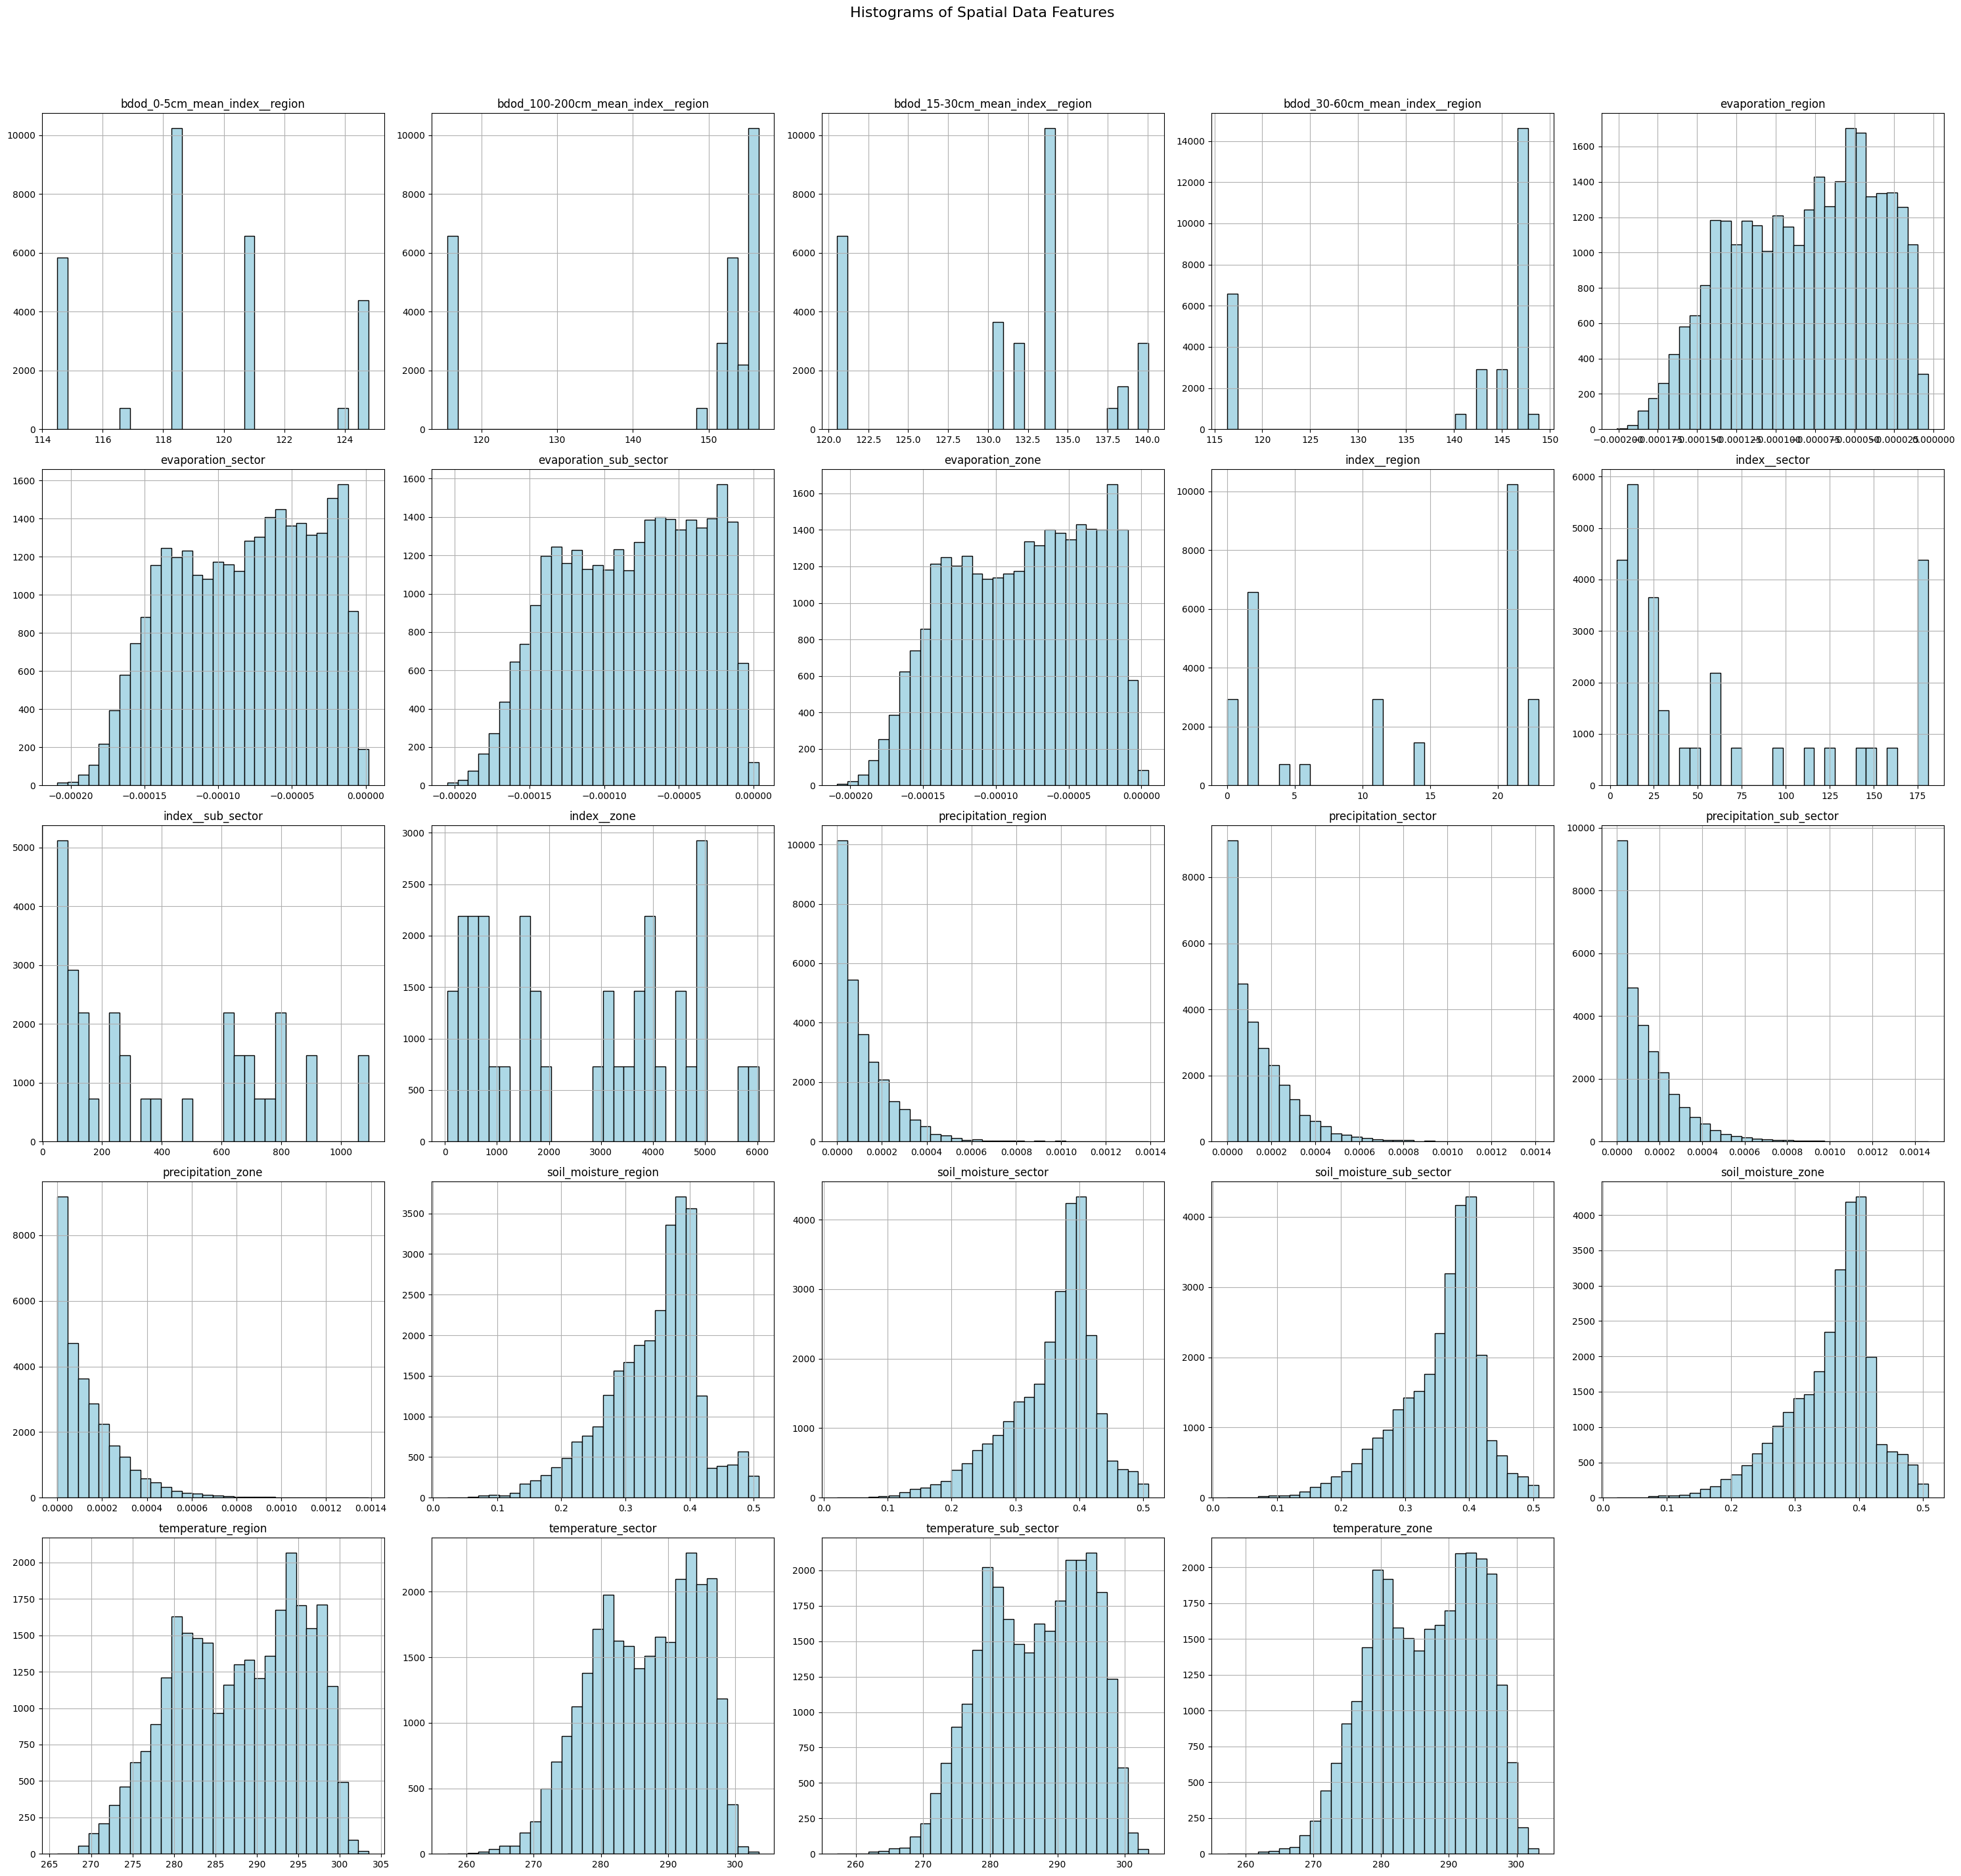

In [25]:
dataset_train.loc[:, sorted(data_dict["spatial_data"][0:24])].hist(
    figsize=(30, 30), bins=30, color="lightblue", edgecolor="black"
)
plt.suptitle("Histograms of Spatial Data Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

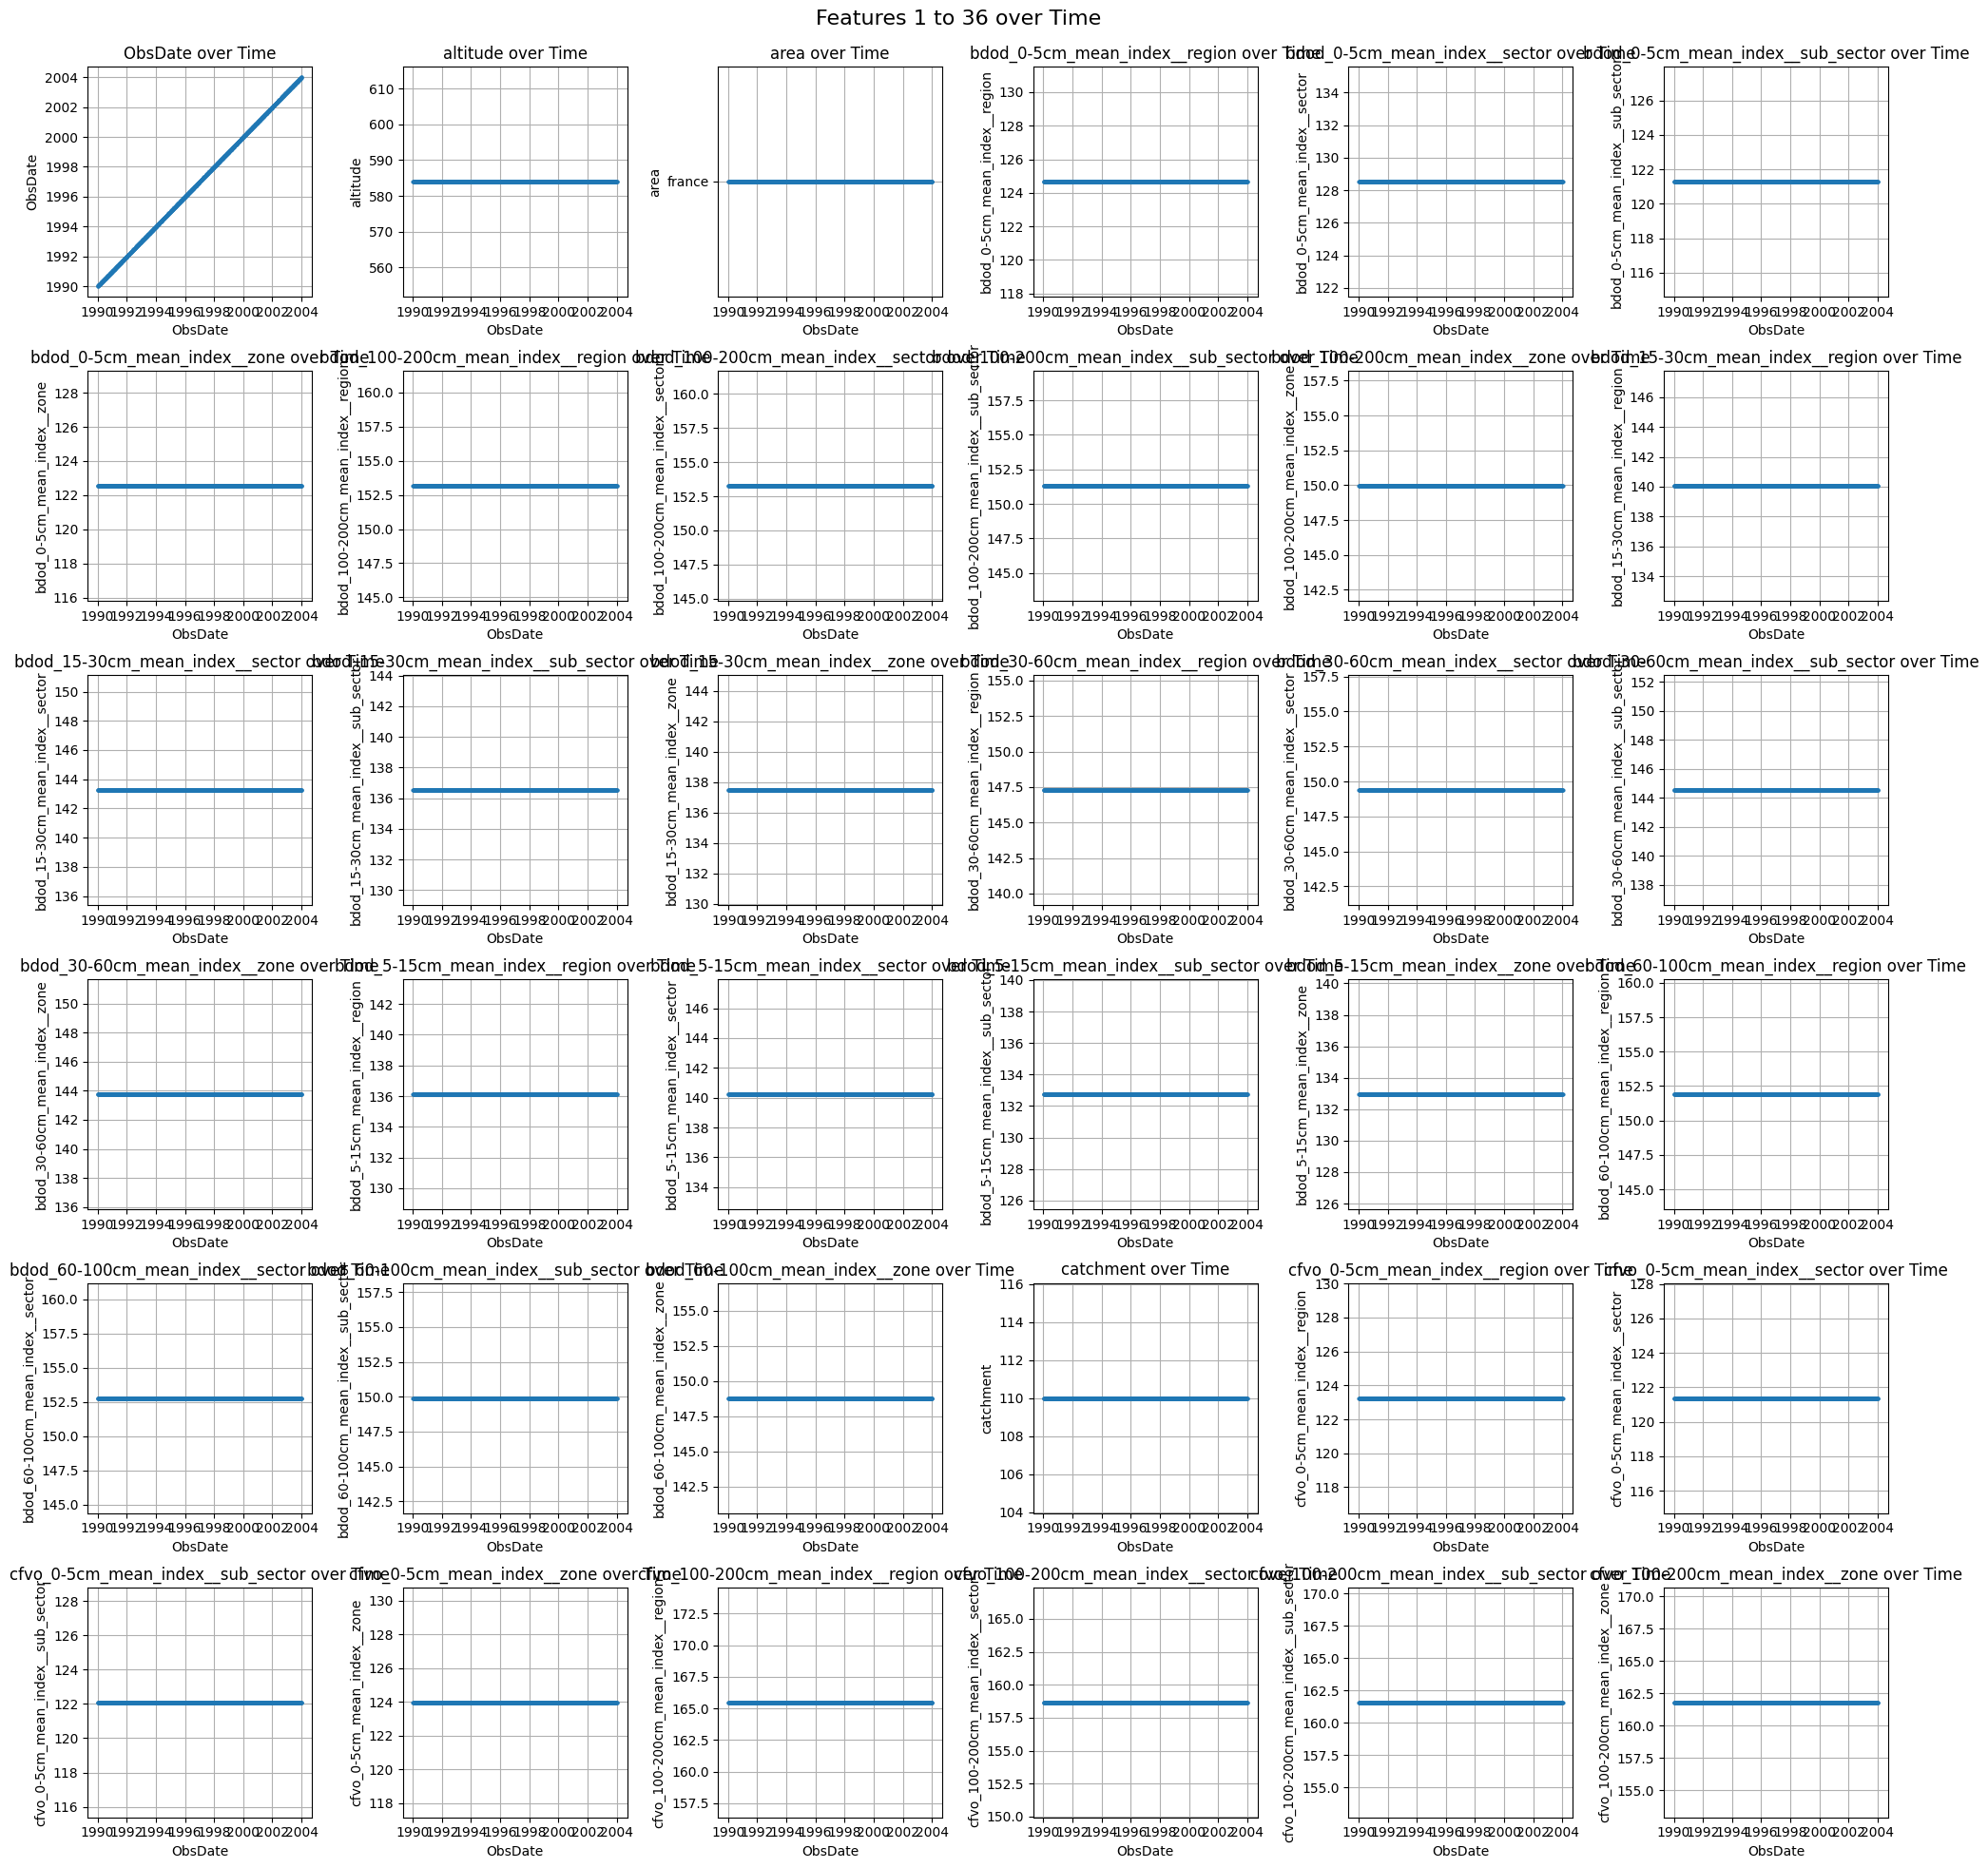

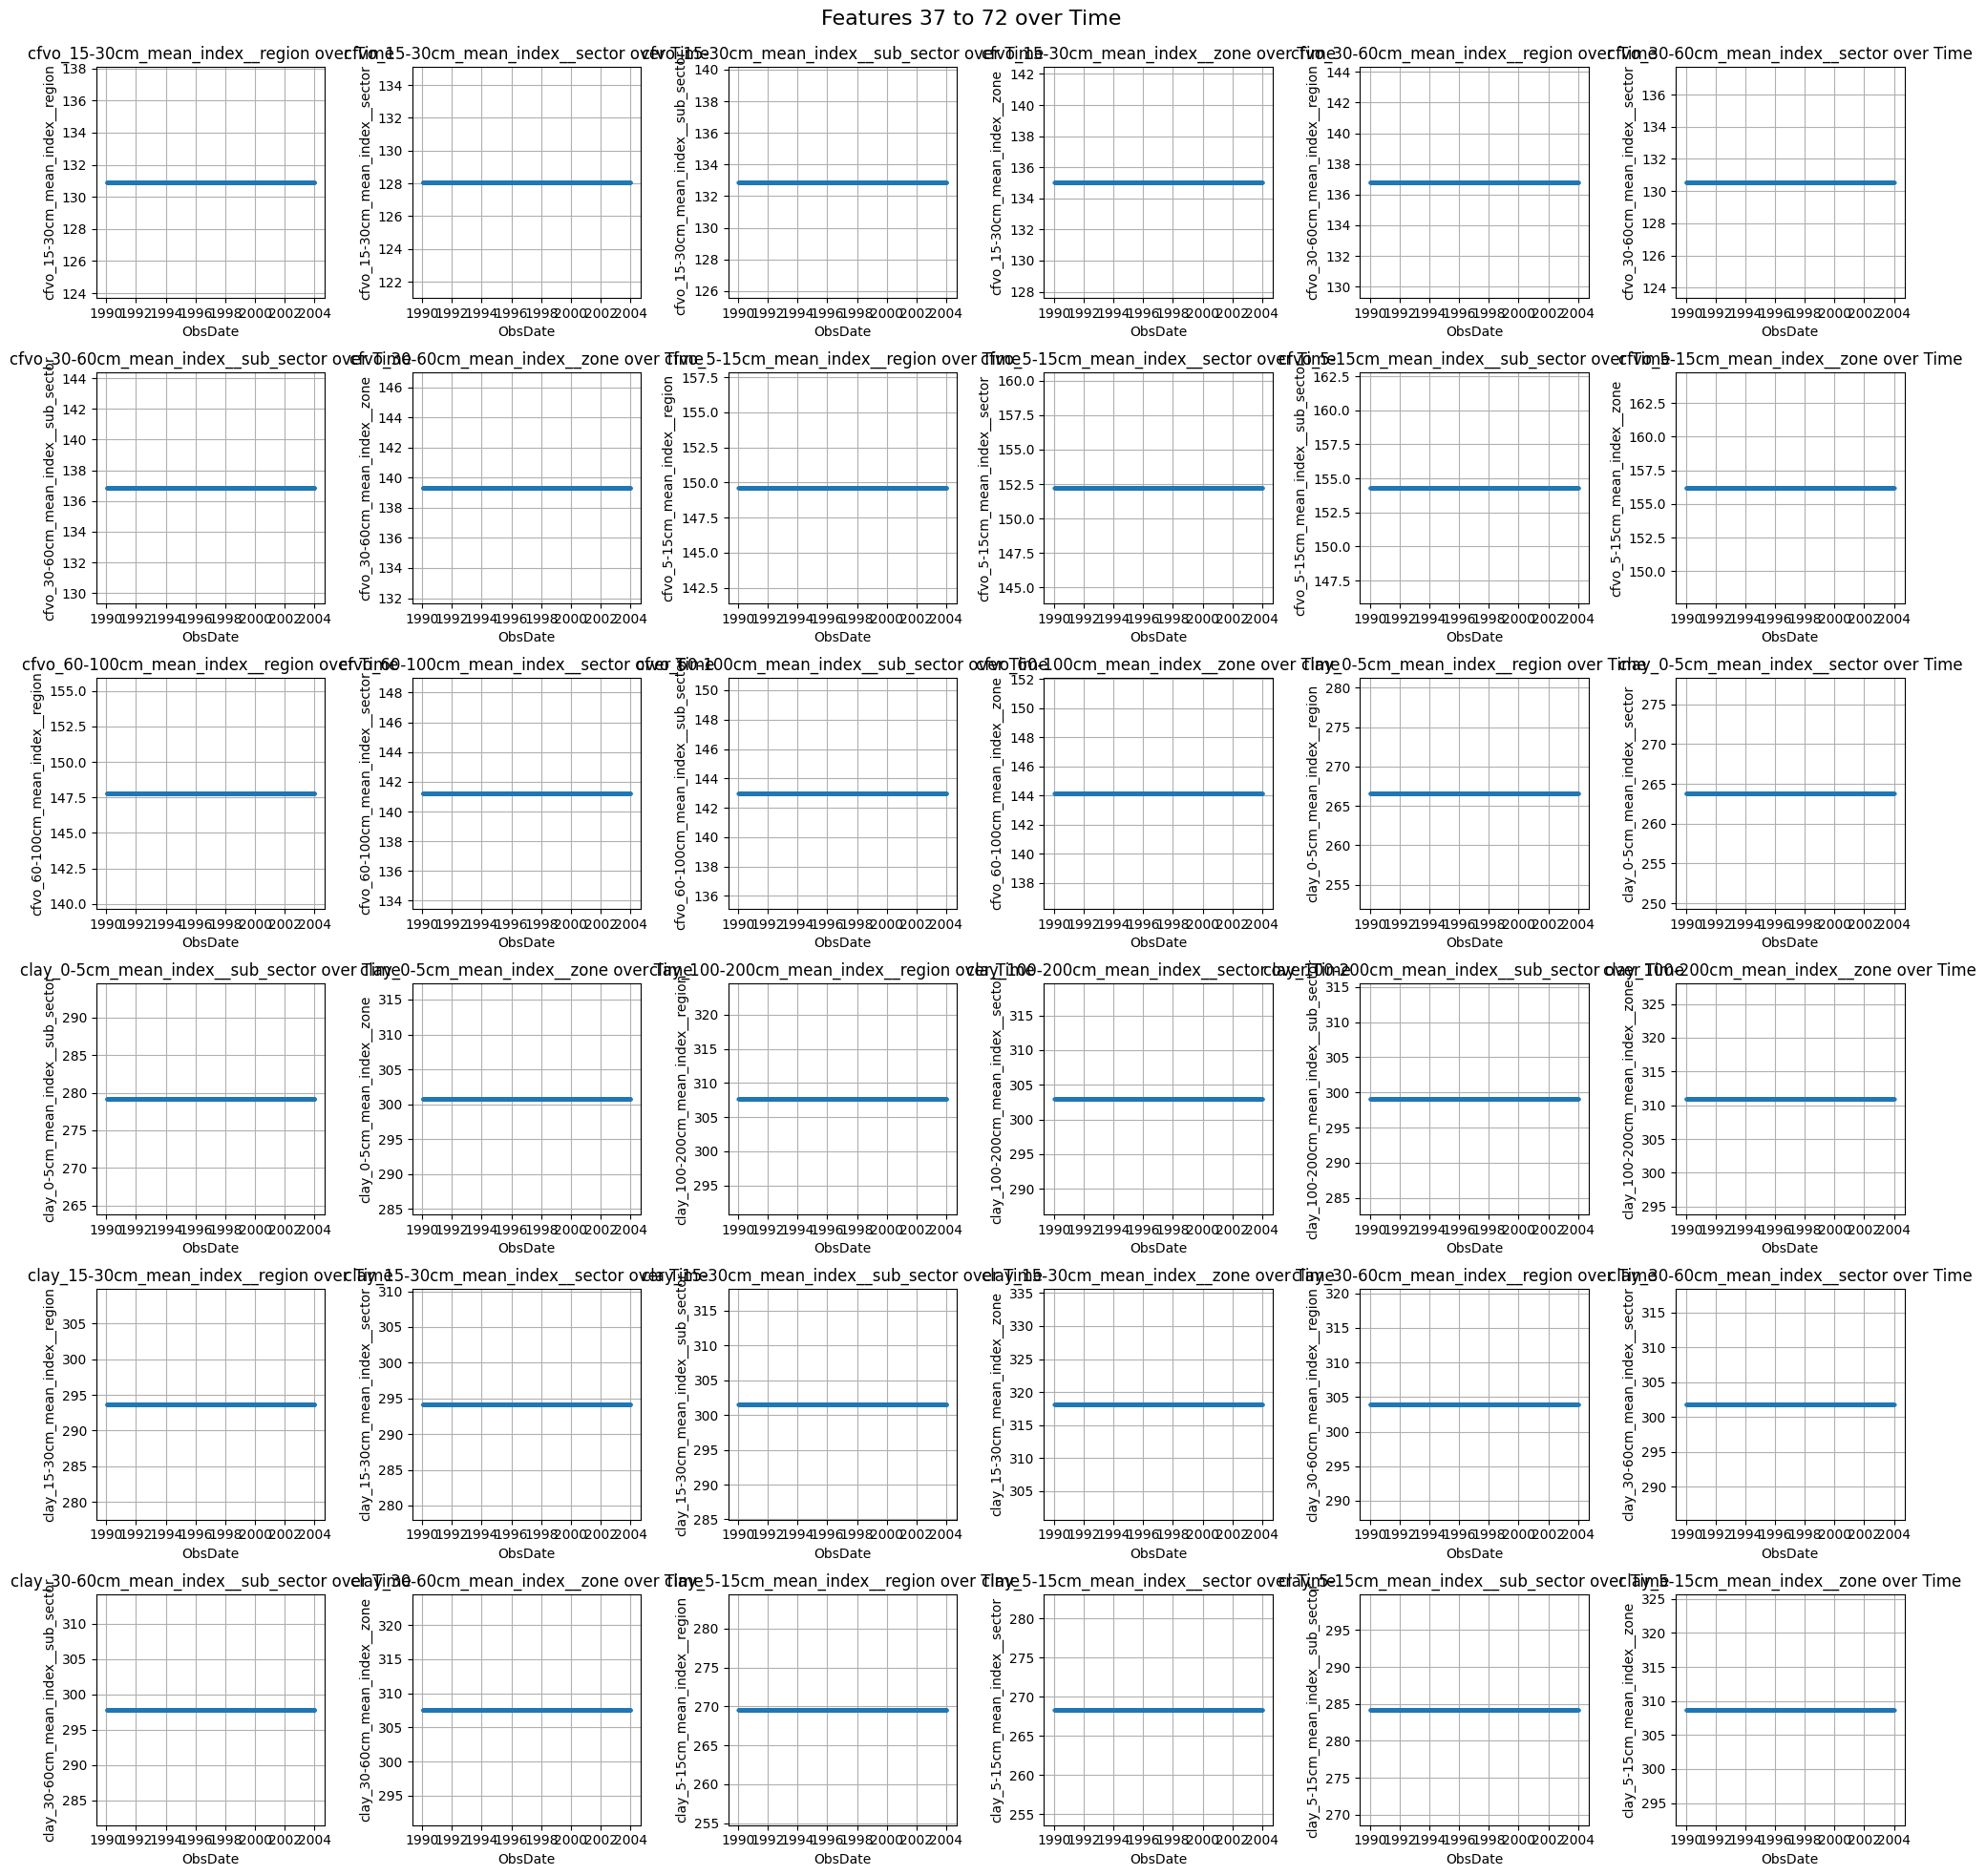

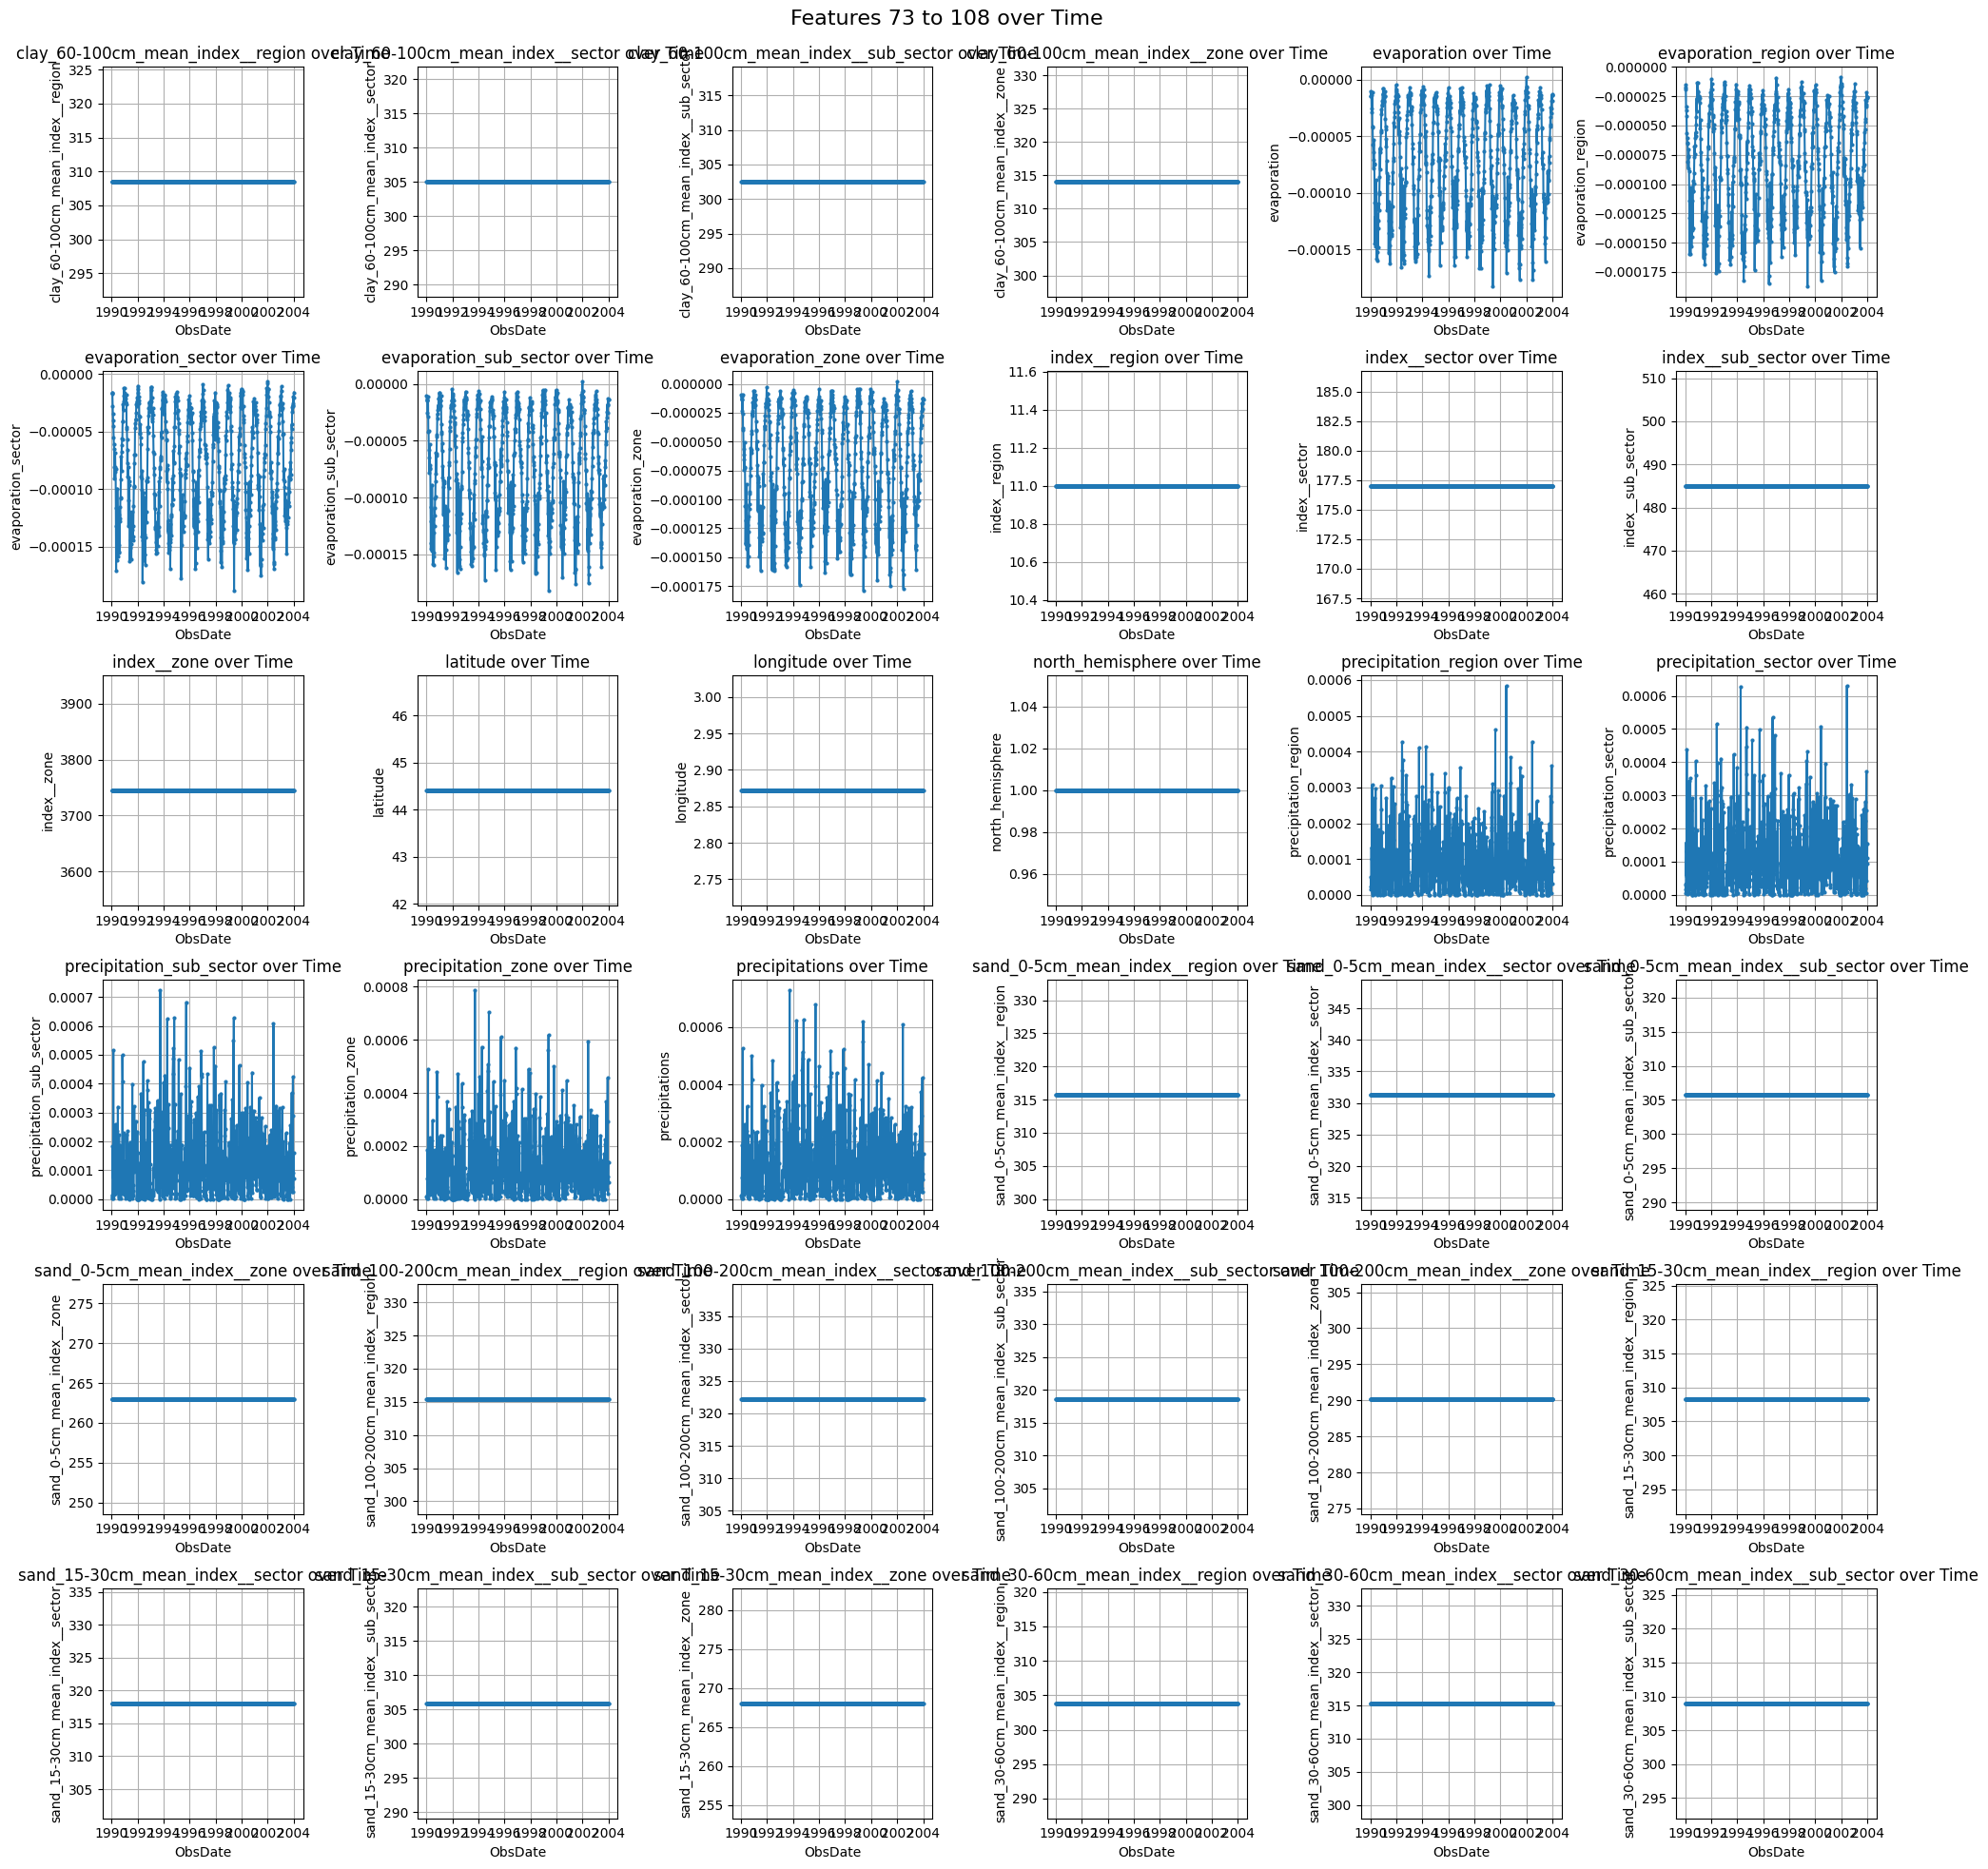

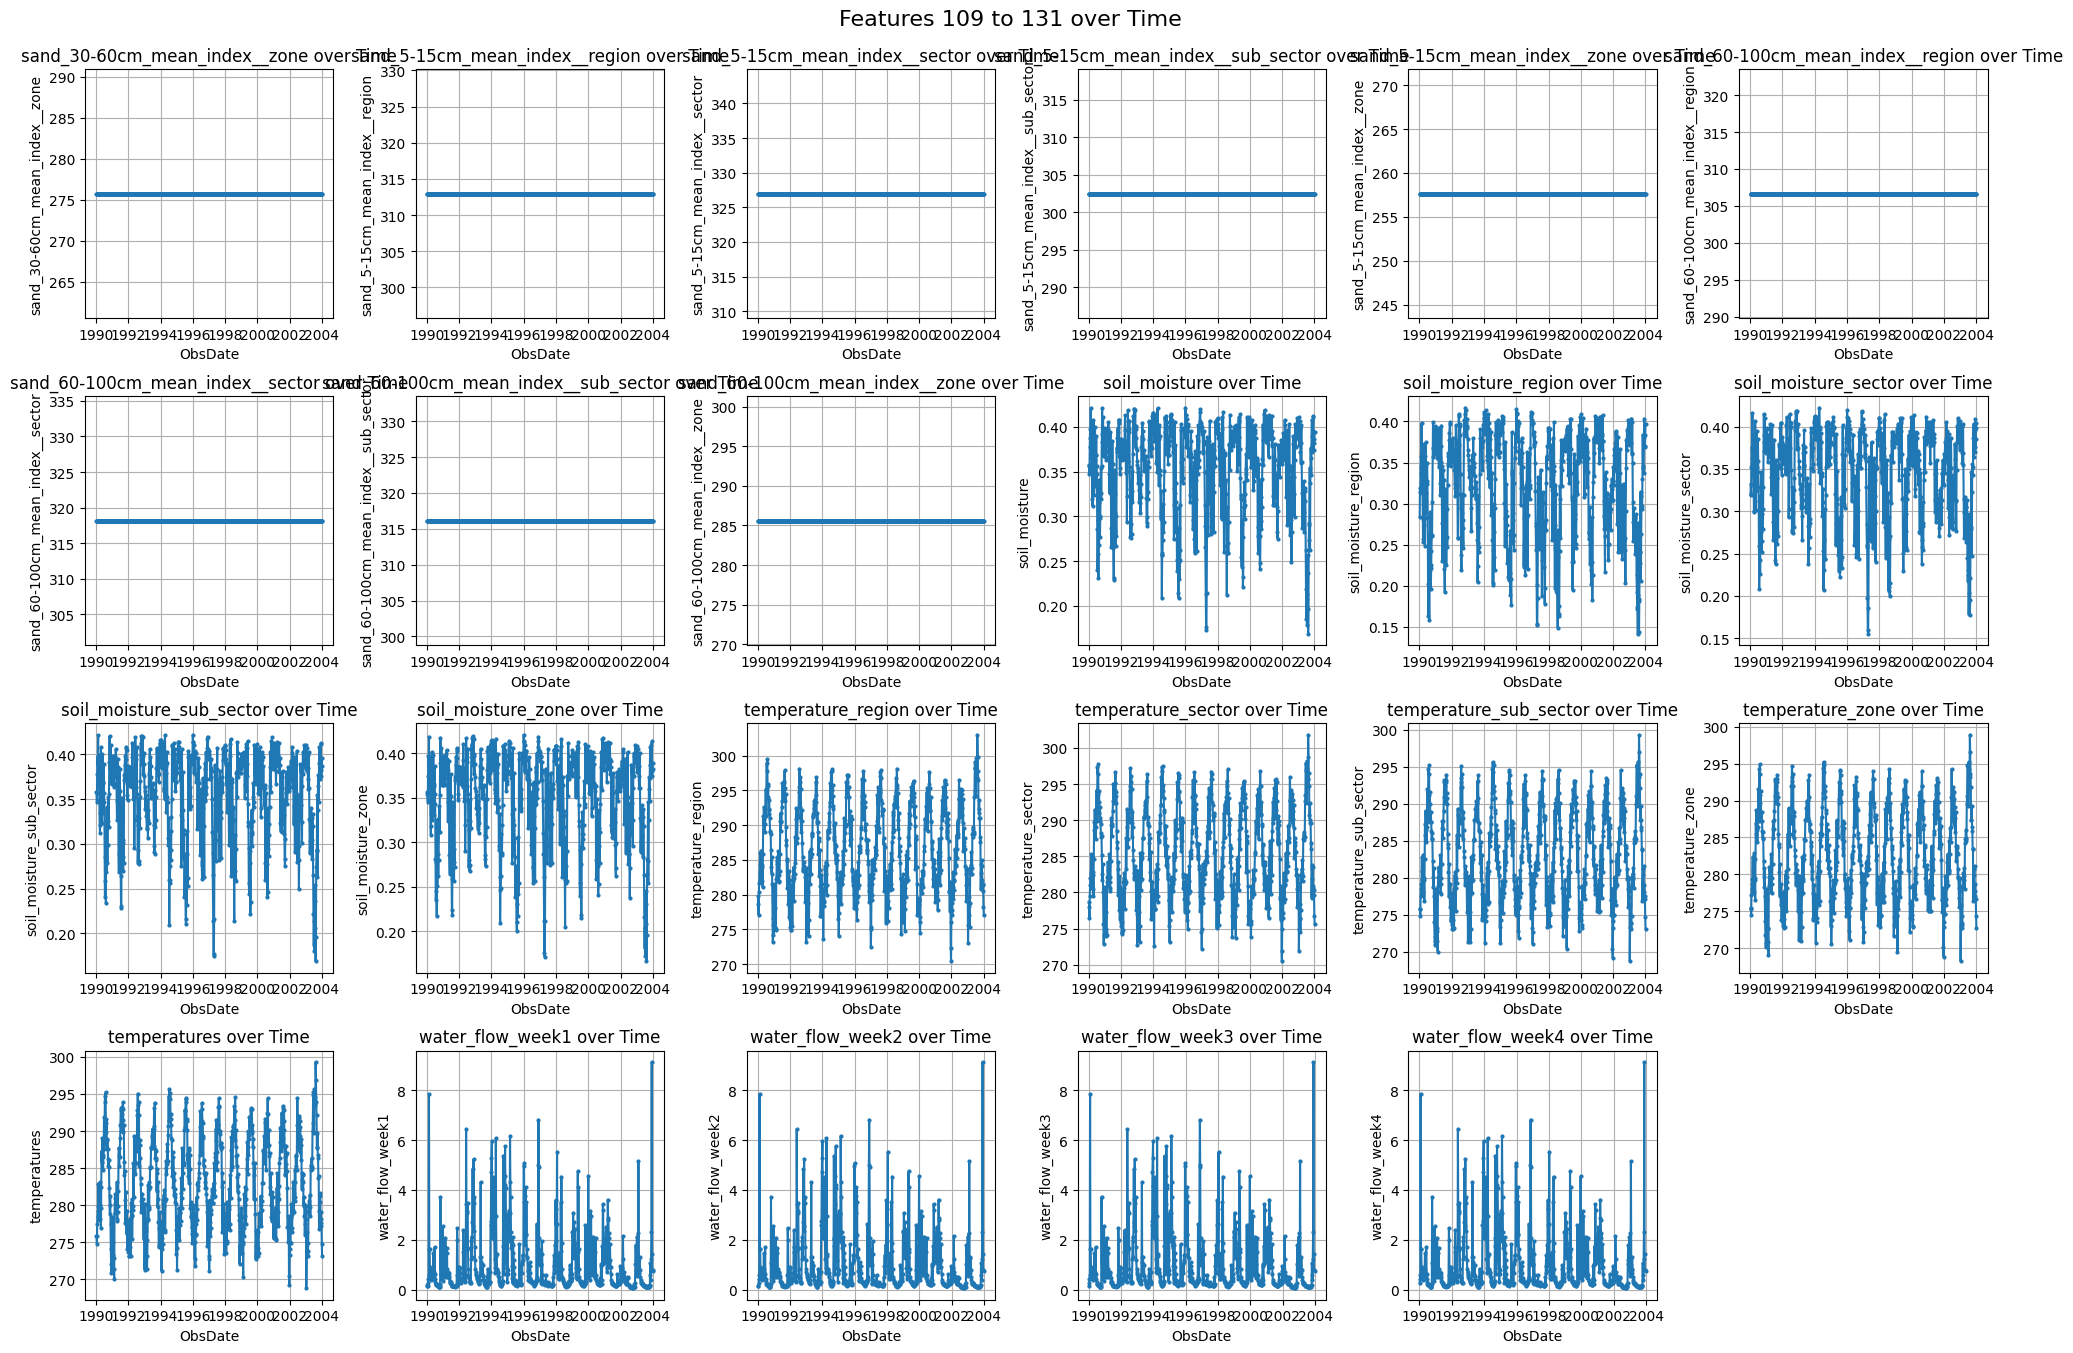

In [26]:
# function that plot 5 plots with 6 * 6 subplots where each subplot is a feature plotted against the time_column set to "ObsDate", or the index if it is a datetime
# data must be relative to one station only
def plot_features_over_time(df, features, time_column="ObsDate"):
    num_features = len(features)
    features_per_plot = 36  # 6x6 subplots
    num_plots = math.ceil(num_features / features_per_plot)

    for plot_idx in range(num_plots):
        start_idx = plot_idx * features_per_plot
        end_idx = min(start_idx + features_per_plot, num_features)
        current_features = features[start_idx:end_idx]

        fig, axes = plt.subplots(6, 6, figsize=(20, 20))
        axes = axes.flatten()

        for i, feature in enumerate(current_features):
            ax = axes[i]
            if time_column in df.columns:
                ax.plot(
                    df[time_column],
                    df[feature],
                    marker="o",
                    linestyle="-",
                    markersize=2,
                )
                ax.set_xlabel(time_column)
            else:
                ax.plot(df.index, df[feature], marker="o", linestyle="-", markersize=2)
                ax.set_xlabel("Index")
            ax.set_ylabel(feature)
            ax.set_title(f"{feature} over Time")
            ax.grid(True)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.suptitle(f"Features {start_idx + 1} to {end_idx} over Time", fontsize=16)
        plt.subplots_adjust(top=0.95)
        plt.show()


random_station = dataset_train["station_code"].sample(1).values[0]
plot_features_over_time(
    dataset_train[dataset_train["station_code"] == random_station],
    sorted(dataset_train.columns.tolist()[1:]),
    time_column="ObsDate",
)

/var/folders/dx/bf0808qn6jbgzmp5j4l001gr0000gn/T/ipykernel_25644/3935452275.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df[time_column] = pd.to_datetime(station_df[time_column])


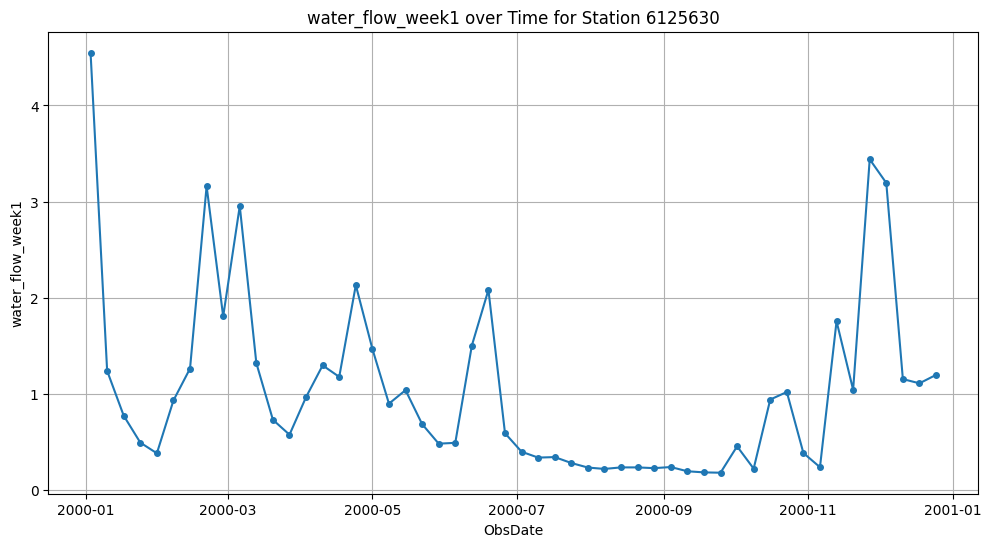

Data acquisition frequency: 7 days 00:00:00


In [27]:
# function that plot a column against another (def ObsDate) for a given station_code, on a specific time period
def plot_column_vs_time(
    df,
    station_code,
    column,
    time_column="ObsDate",
    start_date=None,
    end_date=None,
):
    # Filter by station_code
    station_df = df[df["station_code"] == station_code]

    # Convert time_column to datetime if not already
    station_df[time_column] = pd.to_datetime(station_df[time_column])

    # Filter by date range if provided
    if start_date:
        station_df = station_df[station_df[time_column] >= pd.to_datetime(start_date)]
    if end_date:
        station_df = station_df[station_df[time_column] <= pd.to_datetime(end_date)]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(
        station_df[time_column],
        station_df[column],
        marker="o",
        linestyle="-",
        markersize=4,
    )
    plt.title(f"{column} over Time for Station {station_code}")
    plt.xlabel(time_column)
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

    # print data acquisition frequency
    if len(station_df) > 1:
        time_diffs = station_df[time_column].diff().dropna()
        freq = time_diffs.mode()[0]
        print(f"Data acquisition frequency: {freq}")


# example with random station on 2000-01-01 to 2000-12-31
plot_column_vs_time(
    dataset_train,
    station_code=random_station,
    column="water_flow_week1",
    start_date="2000-01-01",
    end_date="2000-12-31",
)

In [28]:
# from sklearn.model_selection import train_test_split

# # Define target columns (water flow predictions)
# target_cols = [
#     "water_flow_week1",
#     "water_flow_week2",
#     "water_flow_week3",
#     "water_flow_week4",
# ]

# # Define features (exclude target columns and non-feature columns)
# exclude_cols = target_cols + ["ObsDate", "station_code", "index"]
# feature_cols = [col for col in dataset_train.columns if col not in exclude_cols]

# # Create X (features) and y (targets)
# X_train = dataset_train[feature_cols]
# y_train = dataset_train[target_cols]

# print(f"X_train shape: {X_train.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"Features: {len(feature_cols)} columns")
# print(f"Targets: {target_cols}")

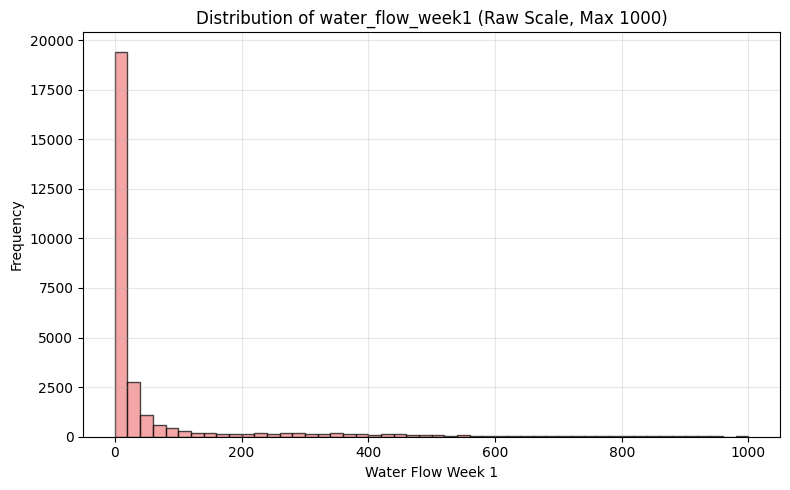

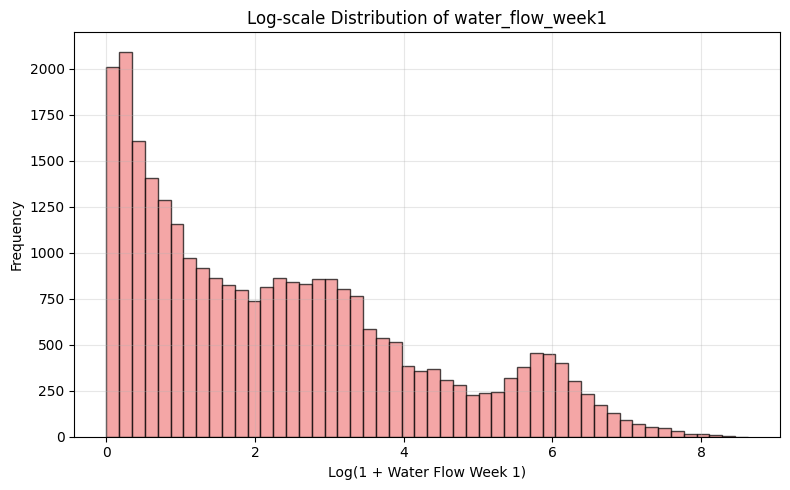

Basic Statistics for water_flow_week1:
count    28509.000000
mean        78.774460
std        235.156259
min          0.000000
25%          0.998286
50%          6.194957
75%         31.300000
max       5603.885929
Name: water_flow_week1, dtype: float64


In [29]:
# Plot distribution of water_flow_week1

# Filter data to only include values <= 1000
max_value = 1000  # Parameterized threshold
filtered_data = dataset_train["water_flow_week1"][
    dataset_train["water_flow_week1"] <= max_value
].dropna()

# Plot the raw distribution
plt.figure(figsize=(8, 5))
plt.hist(filtered_data, bins=50, alpha=0.7, color="lightcoral", edgecolor="black")
plt.title(f"Distribution of water_flow_week1 (Raw Scale, Max {max_value})")
plt.xlabel("Water Flow Week 1")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Plot the log-scale distribution
log_data = np.log1p(
    dataset_train["water_flow_week1"].dropna()
)  # log1p handles zeros better

plt.figure(figsize=(8, 5))
plt.hist(log_data, bins=50, alpha=0.7, color="lightcoral", edgecolor="black")
plt.title("Log-scale Distribution of water_flow_week1")
plt.xlabel("Log(1 + Water Flow Week 1)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print basic statistics
print(f"Basic Statistics for water_flow_week1:")
print(dataset_train["water_flow_week1"].describe())

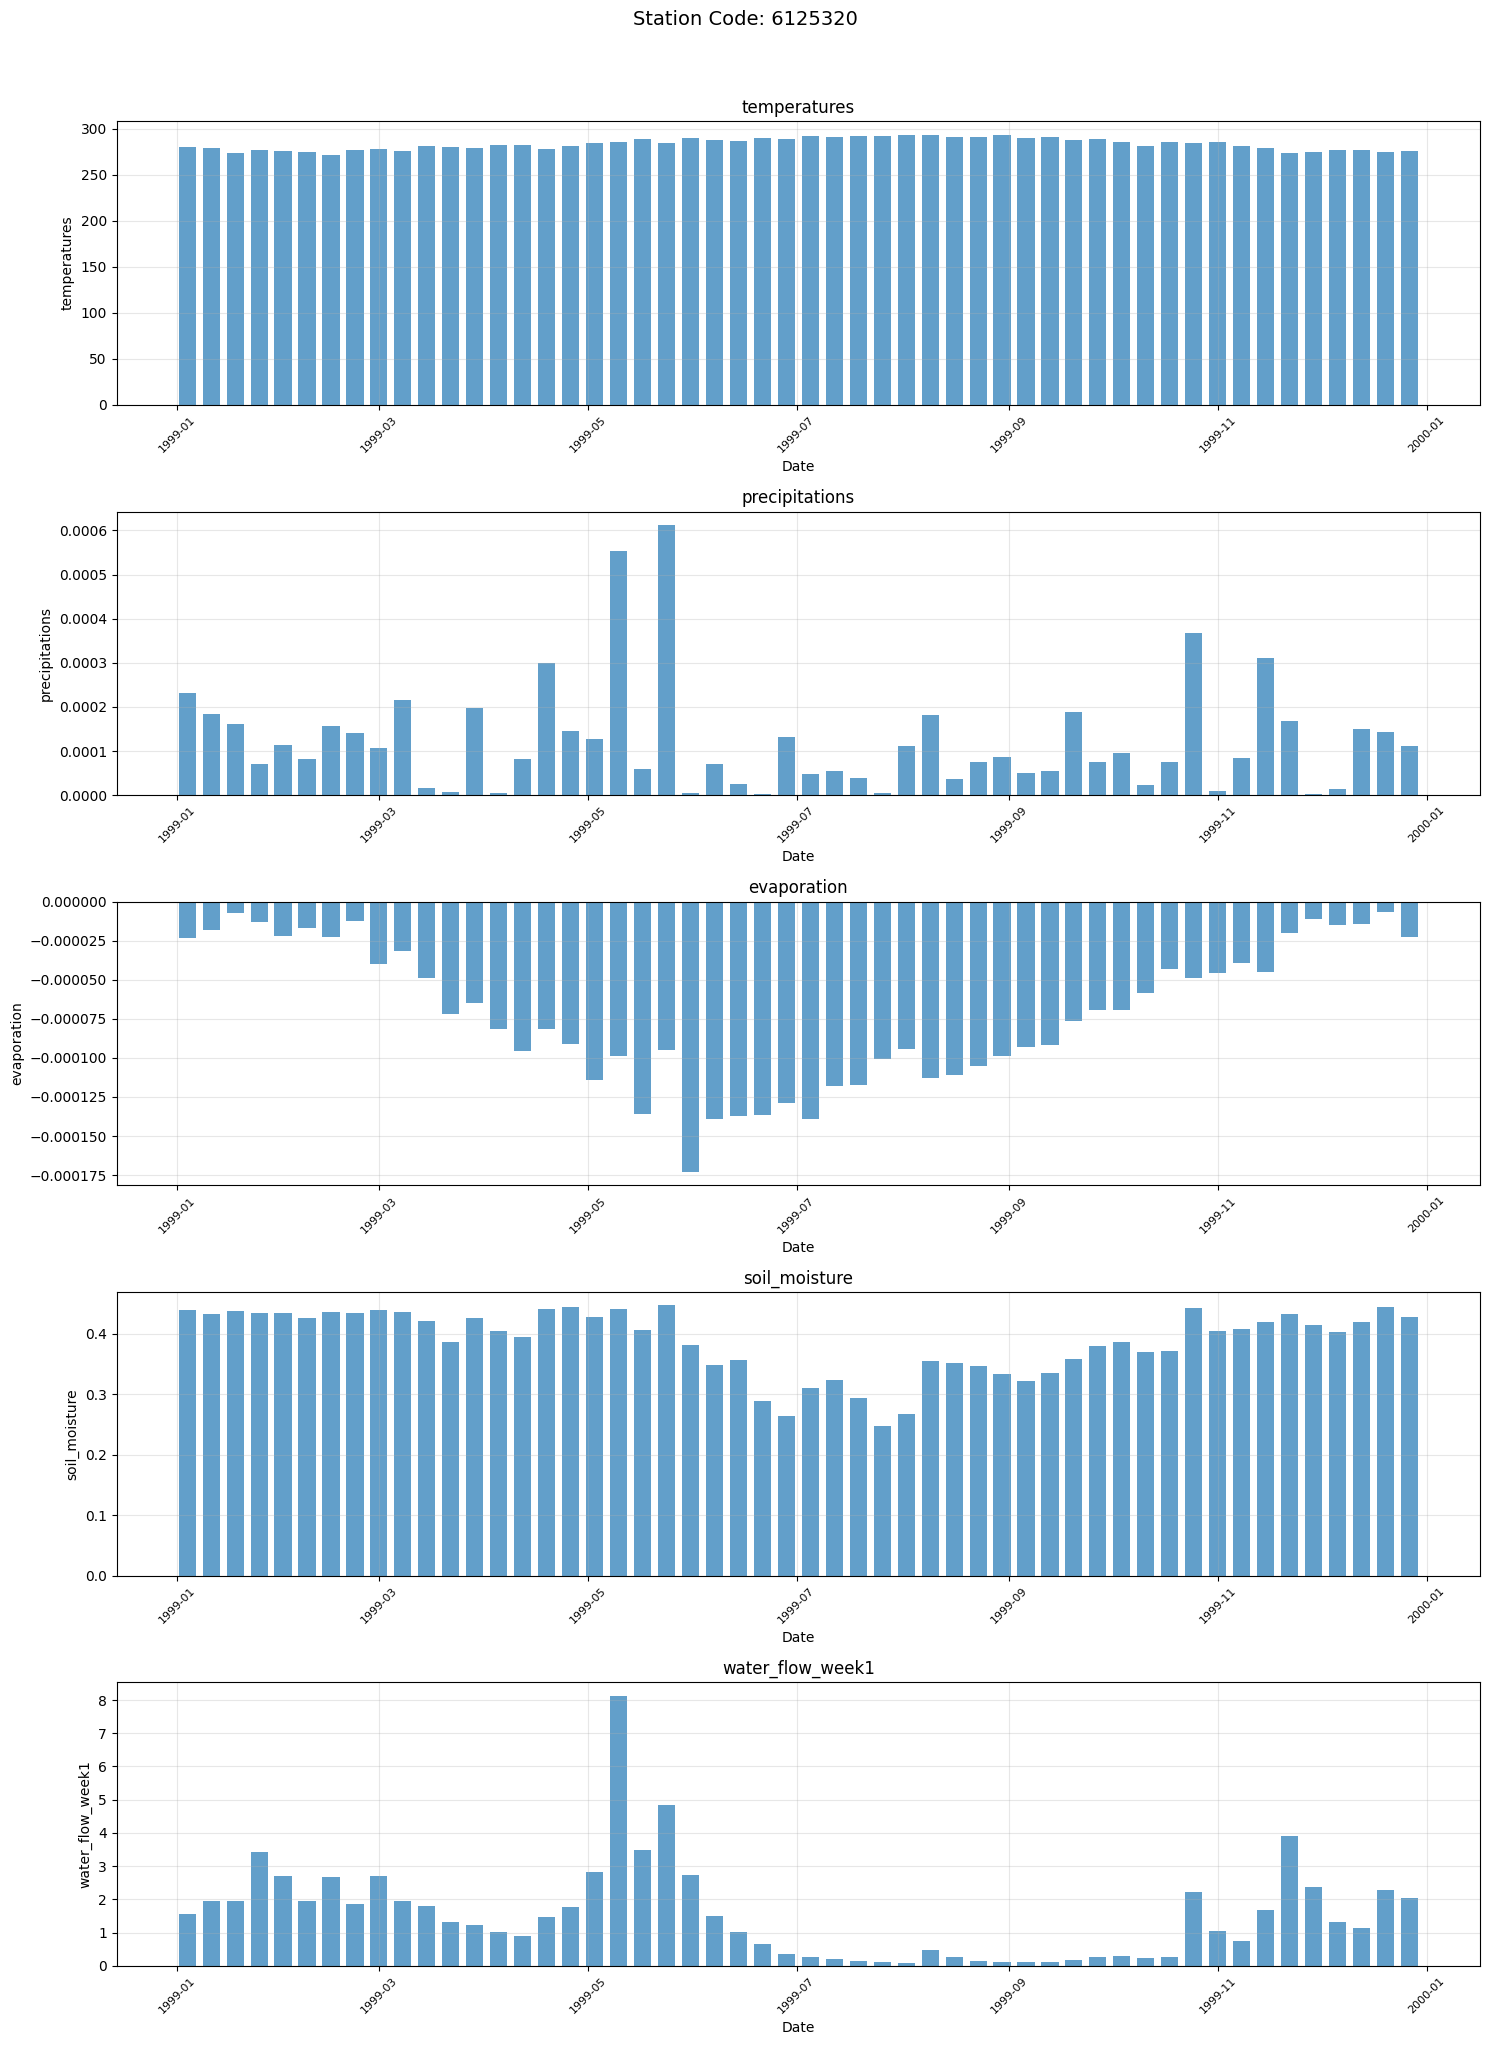

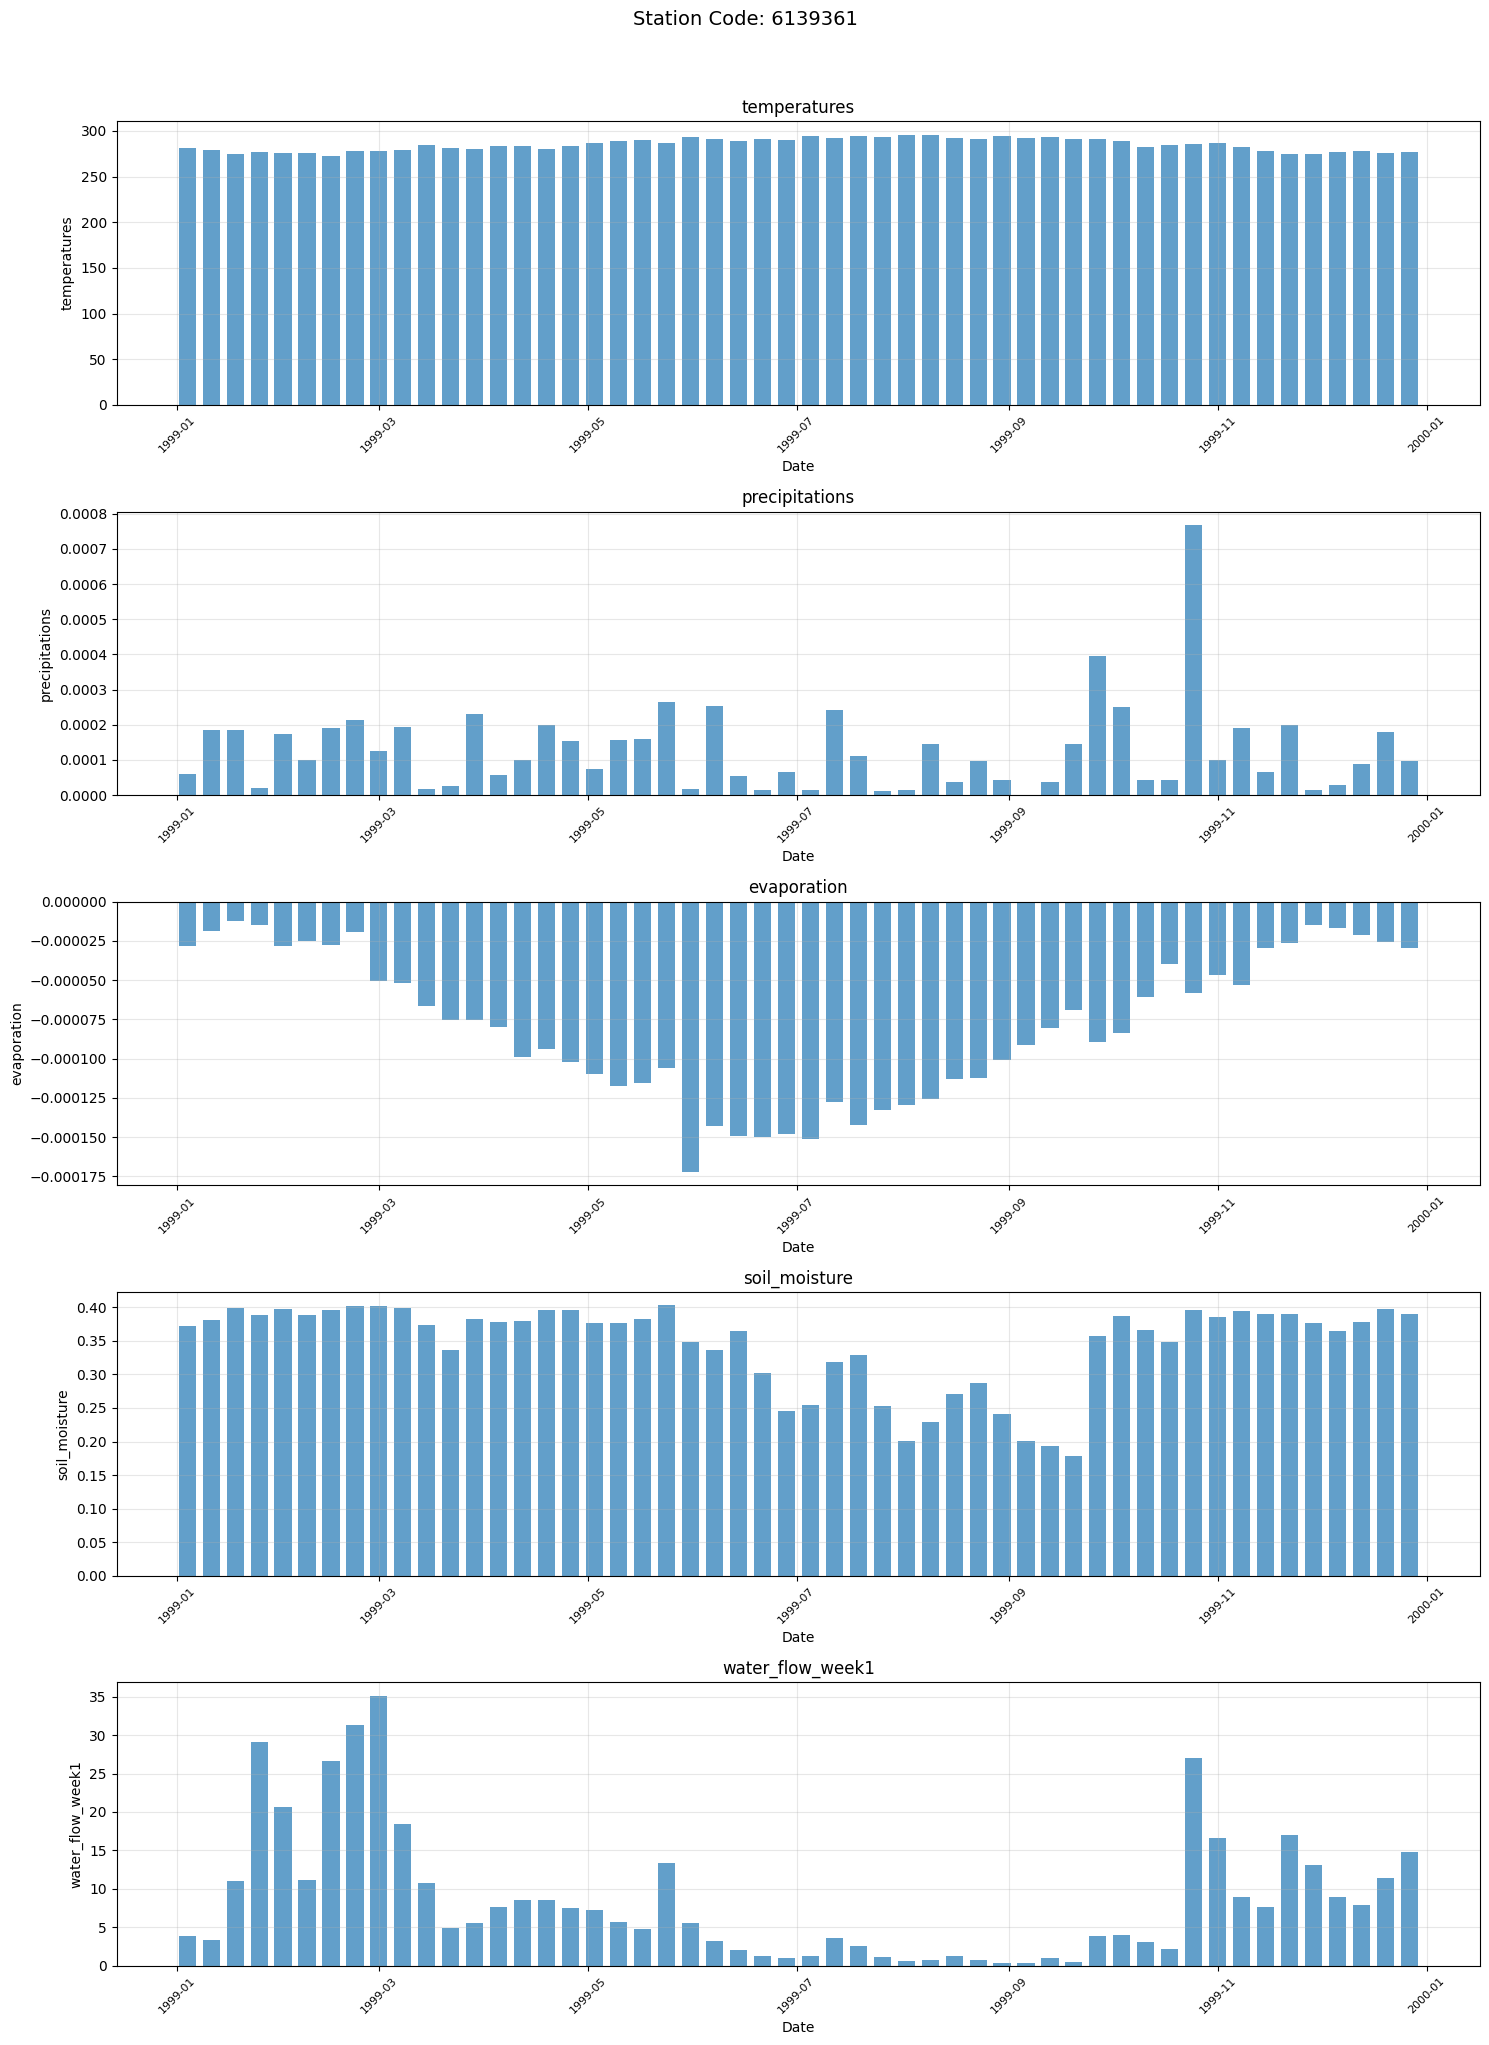

In [30]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_temporal_data_by_station(
    df, temporal_cols, station_codes, start_date=None, end_date=None
):
    # Ensure ObsDate is datetime
    if "ObsDate" not in df.columns:
        raise ValueError("'ObsDate' column not found in DataFrame.")
    if "station_code" not in df.columns:
        raise ValueError("'station_code' column not found in DataFrame.")
    df = df.copy()
    df["ObsDate"] = pd.to_datetime(df["ObsDate"])
    df = df.sort_values("ObsDate")

    # Filter by time interval if provided
    if start_date is not None:
        start_date = pd.to_datetime(start_date)
        df = df[df["ObsDate"] >= start_date]
    if end_date is not None:
        end_date = pd.to_datetime(end_date)
        df = df[df["ObsDate"] <= end_date]

    # For each station code, create a figure with one subplot per time series
    for code in station_codes:
        station_df = df[df["station_code"] == code]
        if station_df.empty:
            print(f"No data for station code: {code}")
            continue

        fig, axes = plt.subplots(
            len(temporal_cols),
            1,
            figsize=(15, 4 * len(temporal_cols)),
            sharex=False,  # Disable sharex
        )
        fig.suptitle(f"Station Code: {code}", y=1.02, fontsize=14)

        # If only one subplot, axes is not an array
        if len(temporal_cols) == 1:
            axes = [axes]

        # Plot each temporal column as a bar plot against ObsDate
        for i, col in enumerate(temporal_cols):
            if col in station_df.columns:
                ax = axes[i]
                ax.bar(
                    station_df["ObsDate"],
                    station_df[col],
                    width=5,
                    alpha=0.7,
                    label=col,
                )
                ax.set_title(col)
                ax.set_xlabel("Date")
                ax.set_ylabel(col)
                ax.grid(True, alpha=0.3)
                ax.tick_params(axis="x", rotation=45, labelsize=8)
            else:
                print(f"Column '{col}' not found in DataFrame.")

        plt.tight_layout()
        plt.show()


# Example usage:
plot_temporal_data_by_station(
    dataset_train,
    [
        ts
        for ts in data_dict["temporal_data"]
        if ts
        not in ["ObsDate", "water_flow_week2", "water_flow_week3", "water_flow_week4"]
    ],
    station_codes=dataset_train["station_code"].sample(n=2, random_state=42).unique(),
    start_date="1999-01-01",
    end_date="1999-12-31",
)

Sampled stations: [6119110, 6139825, 56850000, 56994500]


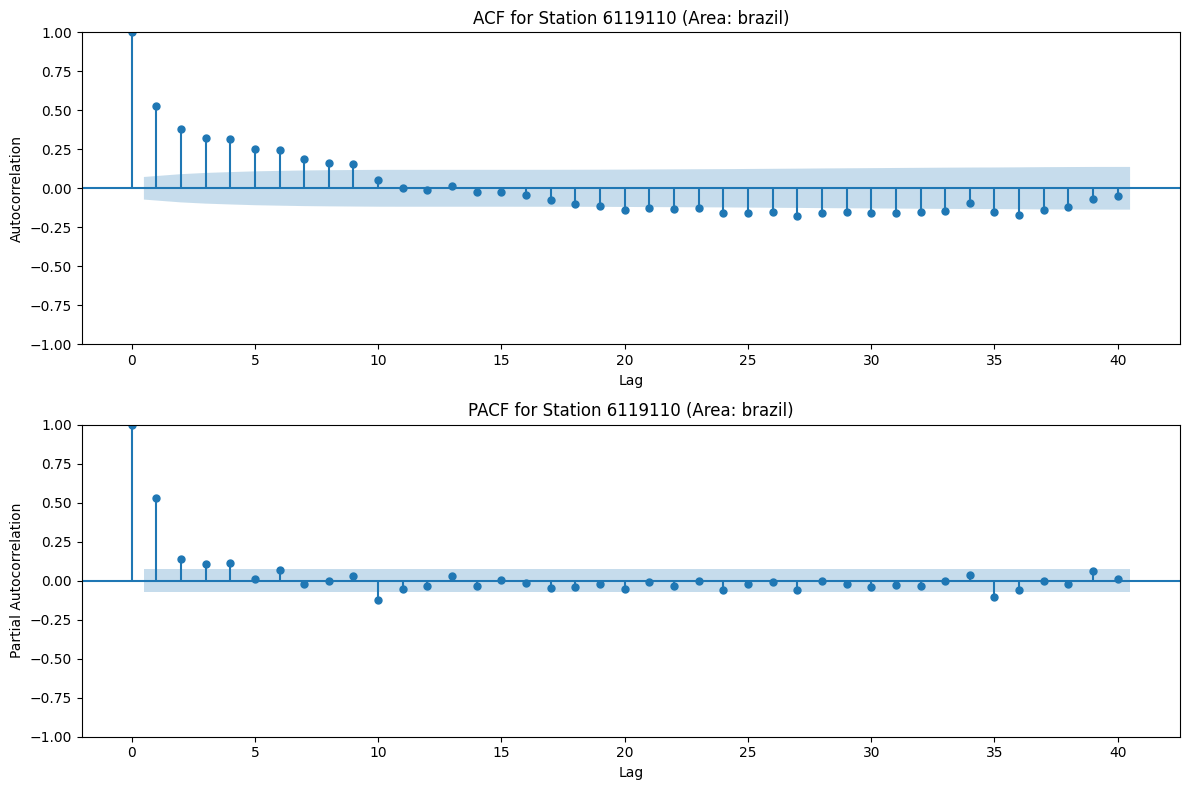

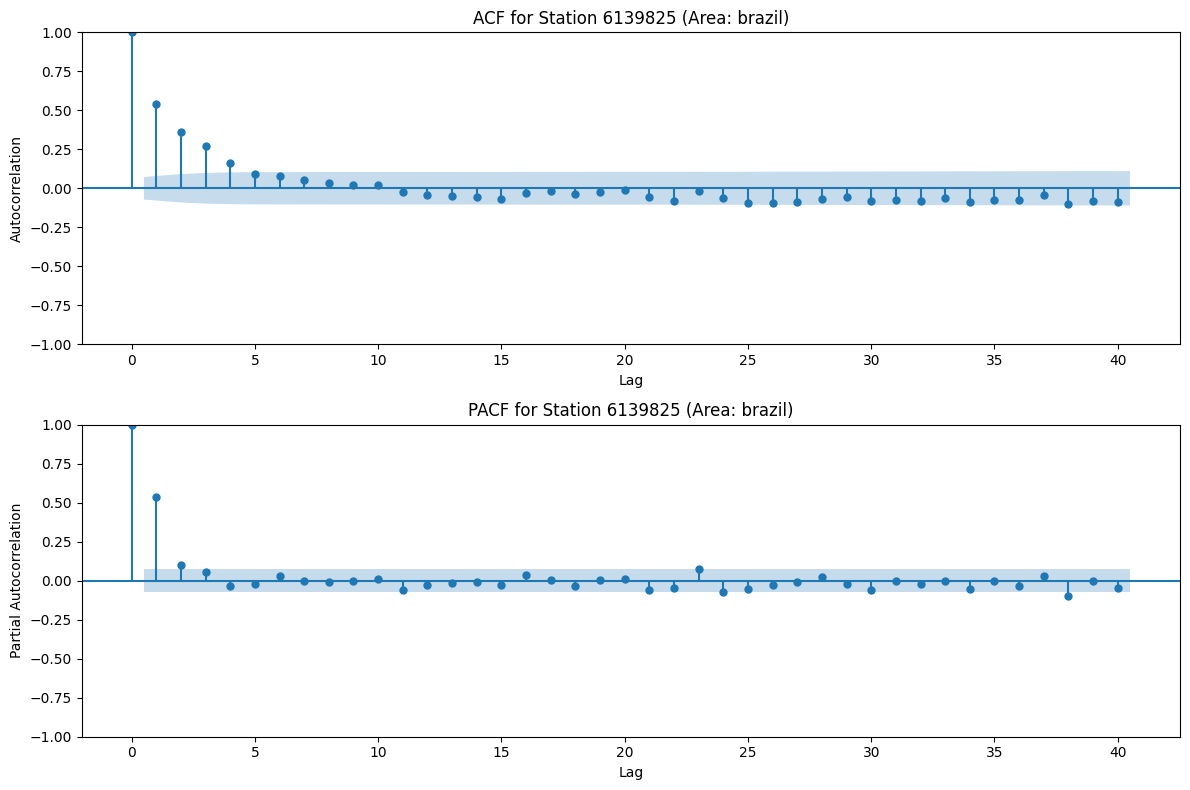

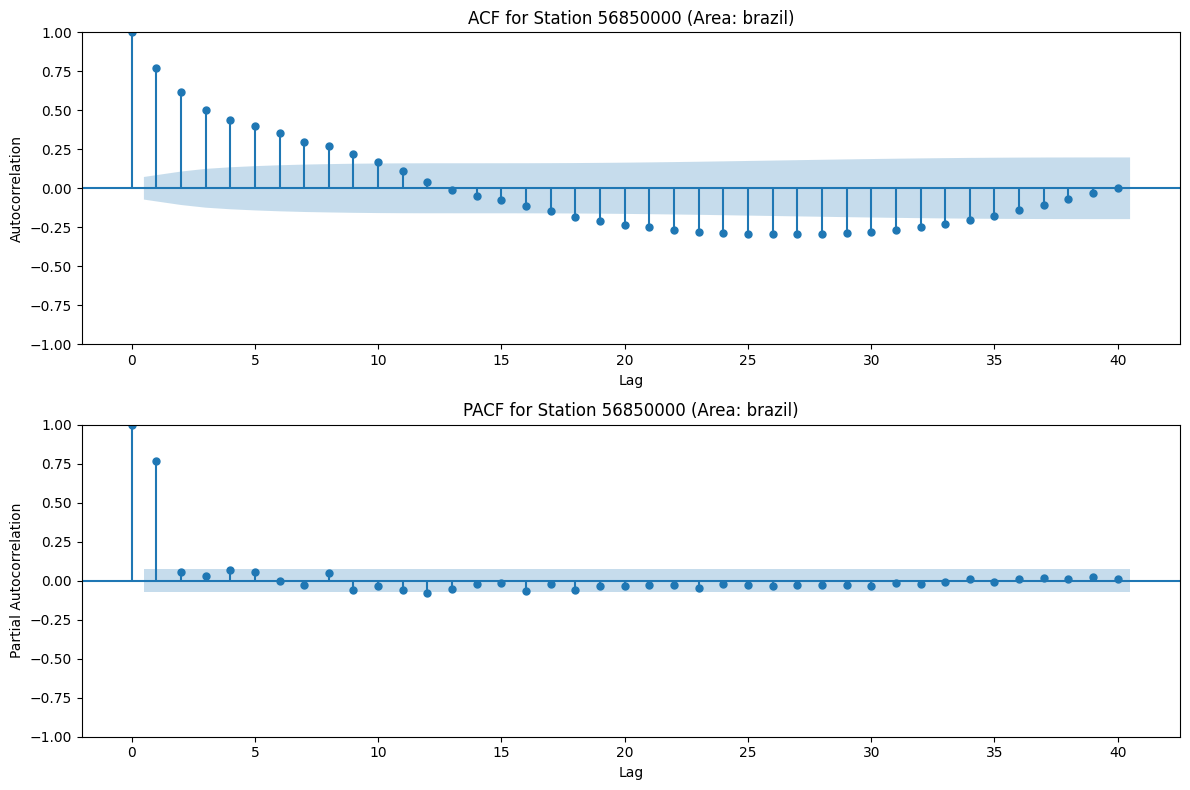

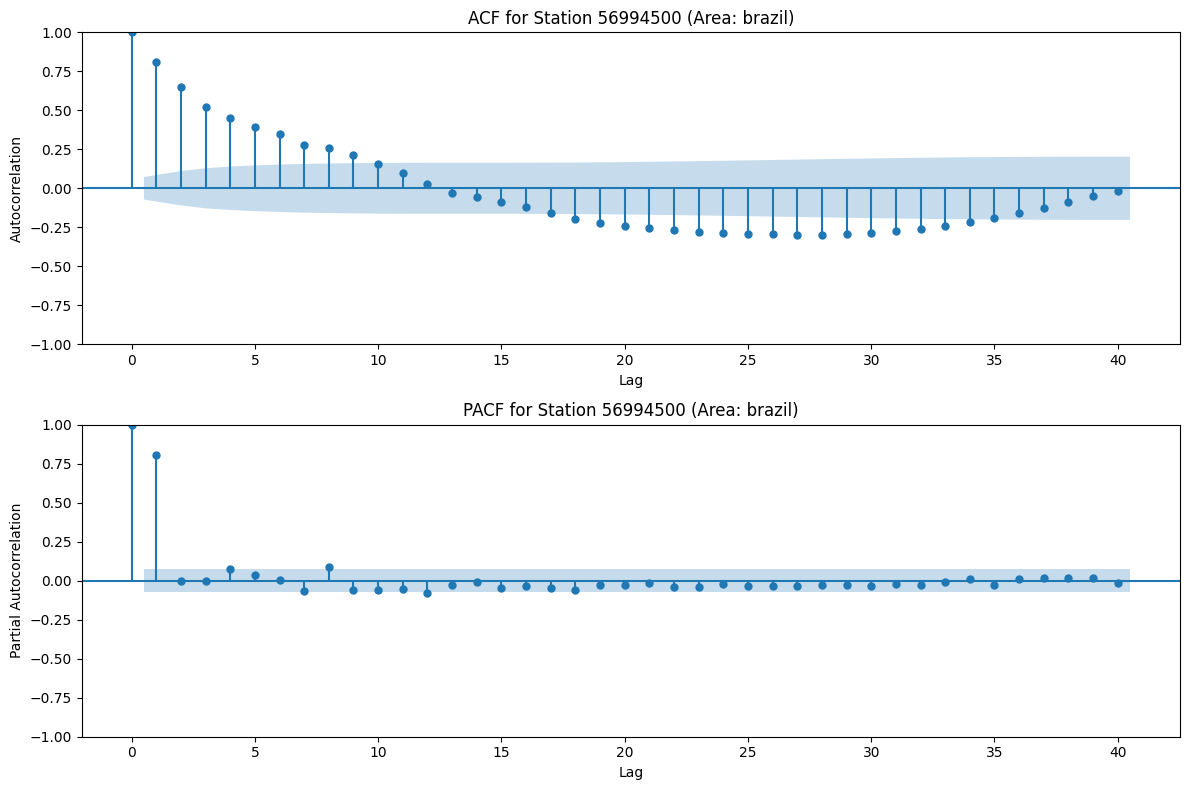

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


def plot_acf_pacf_for_stations(
    df: pd.DataFrame,
    area_col: str = "area",
    code_col: str = "station_code",
    date_col: str = "ObsDate",
    value_col: str = "water_flow_week1",
    areas: list = ["france", "brazil"],
    n_stations: int = 2,
    lags: int = 40,
    alpha: float = 0.05,
    random_seed: int = 42,
):
    """
    Samples stations from specified areas and plots ACF and PACF for each station's water flow series.

    Parameters:
    - df: DataFrame containing the data.
    - area_col: Name of the column with area names (default: "area").
    - code_col: Name of the column with station codes (default: "station_code").
    - date_col: Name of the column with dates (default: "ObsDate").
    - value_col: Name of the column with water flow values (default: "water_flow_week1").
    - areas: List of areas to sample stations from (default: ["france", "brazil"]).
    - n_stations: Number of stations to sample per area (default: 2).
    - lags: Number of lags to display in ACF/PACF plots (default: 40).
    - alpha: Significance level for confidence intervals (default: 0.05).
    - random_seed: Seed for reproducibility (default: 42).
    """
    rng = np.random.default_rng(random_seed)

    def sample_codes(df, area, n):
        codes = pd.Index(df.loc[df[area_col] == area, code_col].dropna().unique())
        if len(codes) == 0:
            return []
        n = min(n, len(codes))
        idx = rng.choice(len(codes), size=n, replace=False)
        return list(codes.take(idx))

    # Sample station codes
    station_codes = []
    for area in areas:
        station_codes.extend(sample_codes(df, area, n_stations))

    print(f"Sampled stations: {station_codes}")

    # Plot ACF and PACF per station
    for code in station_codes:
        station_df = df.loc[df[code_col] == code].sort_values(date_col)
        series = station_df[value_col].dropna()
        if series.empty:
            print(f"No data for station {code}")
            continue

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        plot_acf(series, lags=lags, ax=ax1, alpha=alpha)
        ax1.set_title(f"ACF for Station {code} ({area_col.capitalize()}: {area})")
        ax1.set_xlabel("Lag")
        ax1.set_ylabel("Autocorrelation")

        plot_pacf(series, lags=lags, ax=ax2, alpha=alpha)
        ax2.set_title(f"PACF for Station {code} ({area_col.capitalize()}: {area})")
        ax2.set_xlabel("Lag")
        ax2.set_ylabel("Partial Autocorrelation")

        plt.tight_layout()
        plt.show()


# Example usage:
plot_acf_pacf_for_stations(dataset_train)

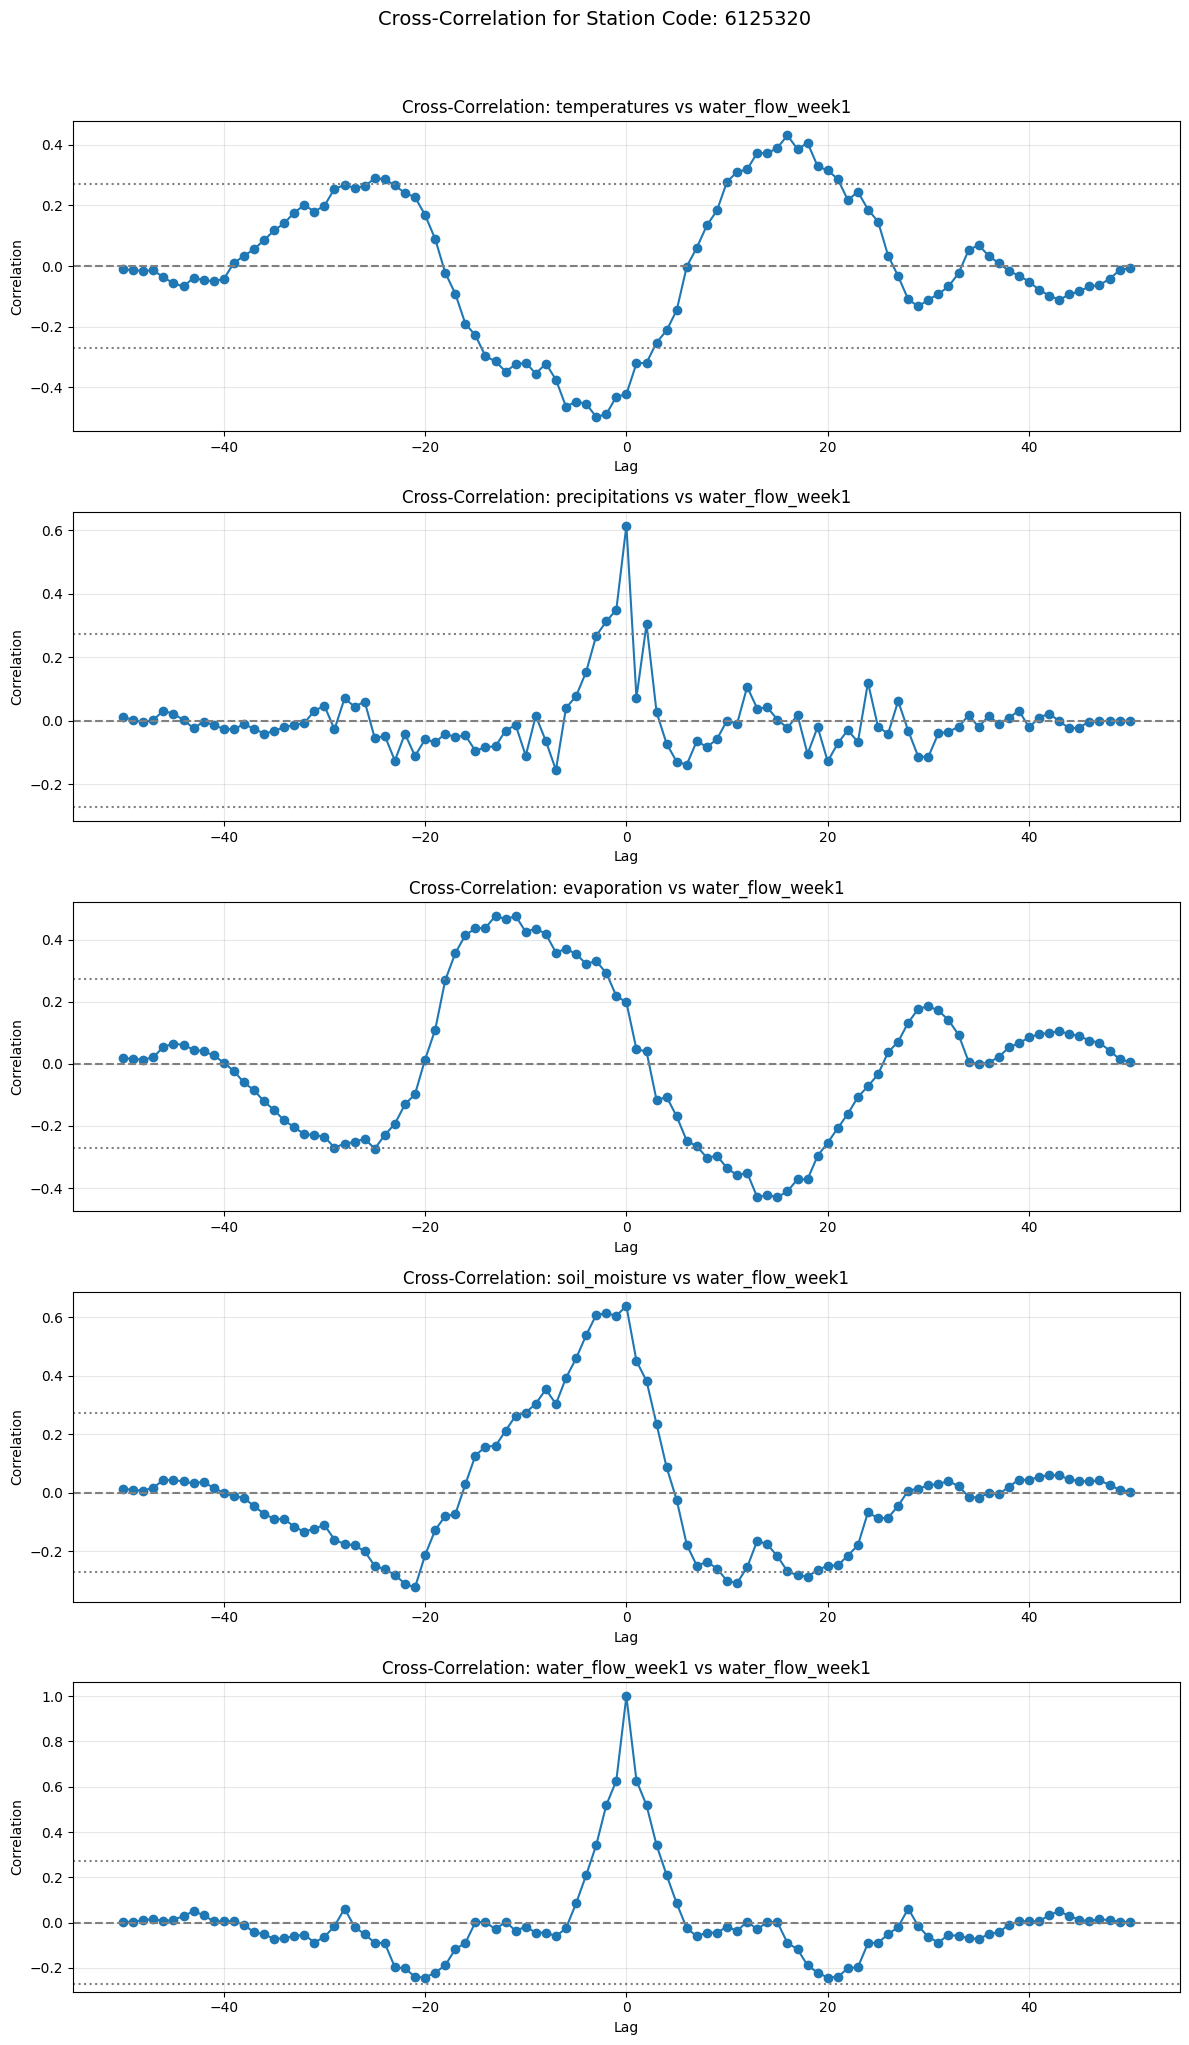

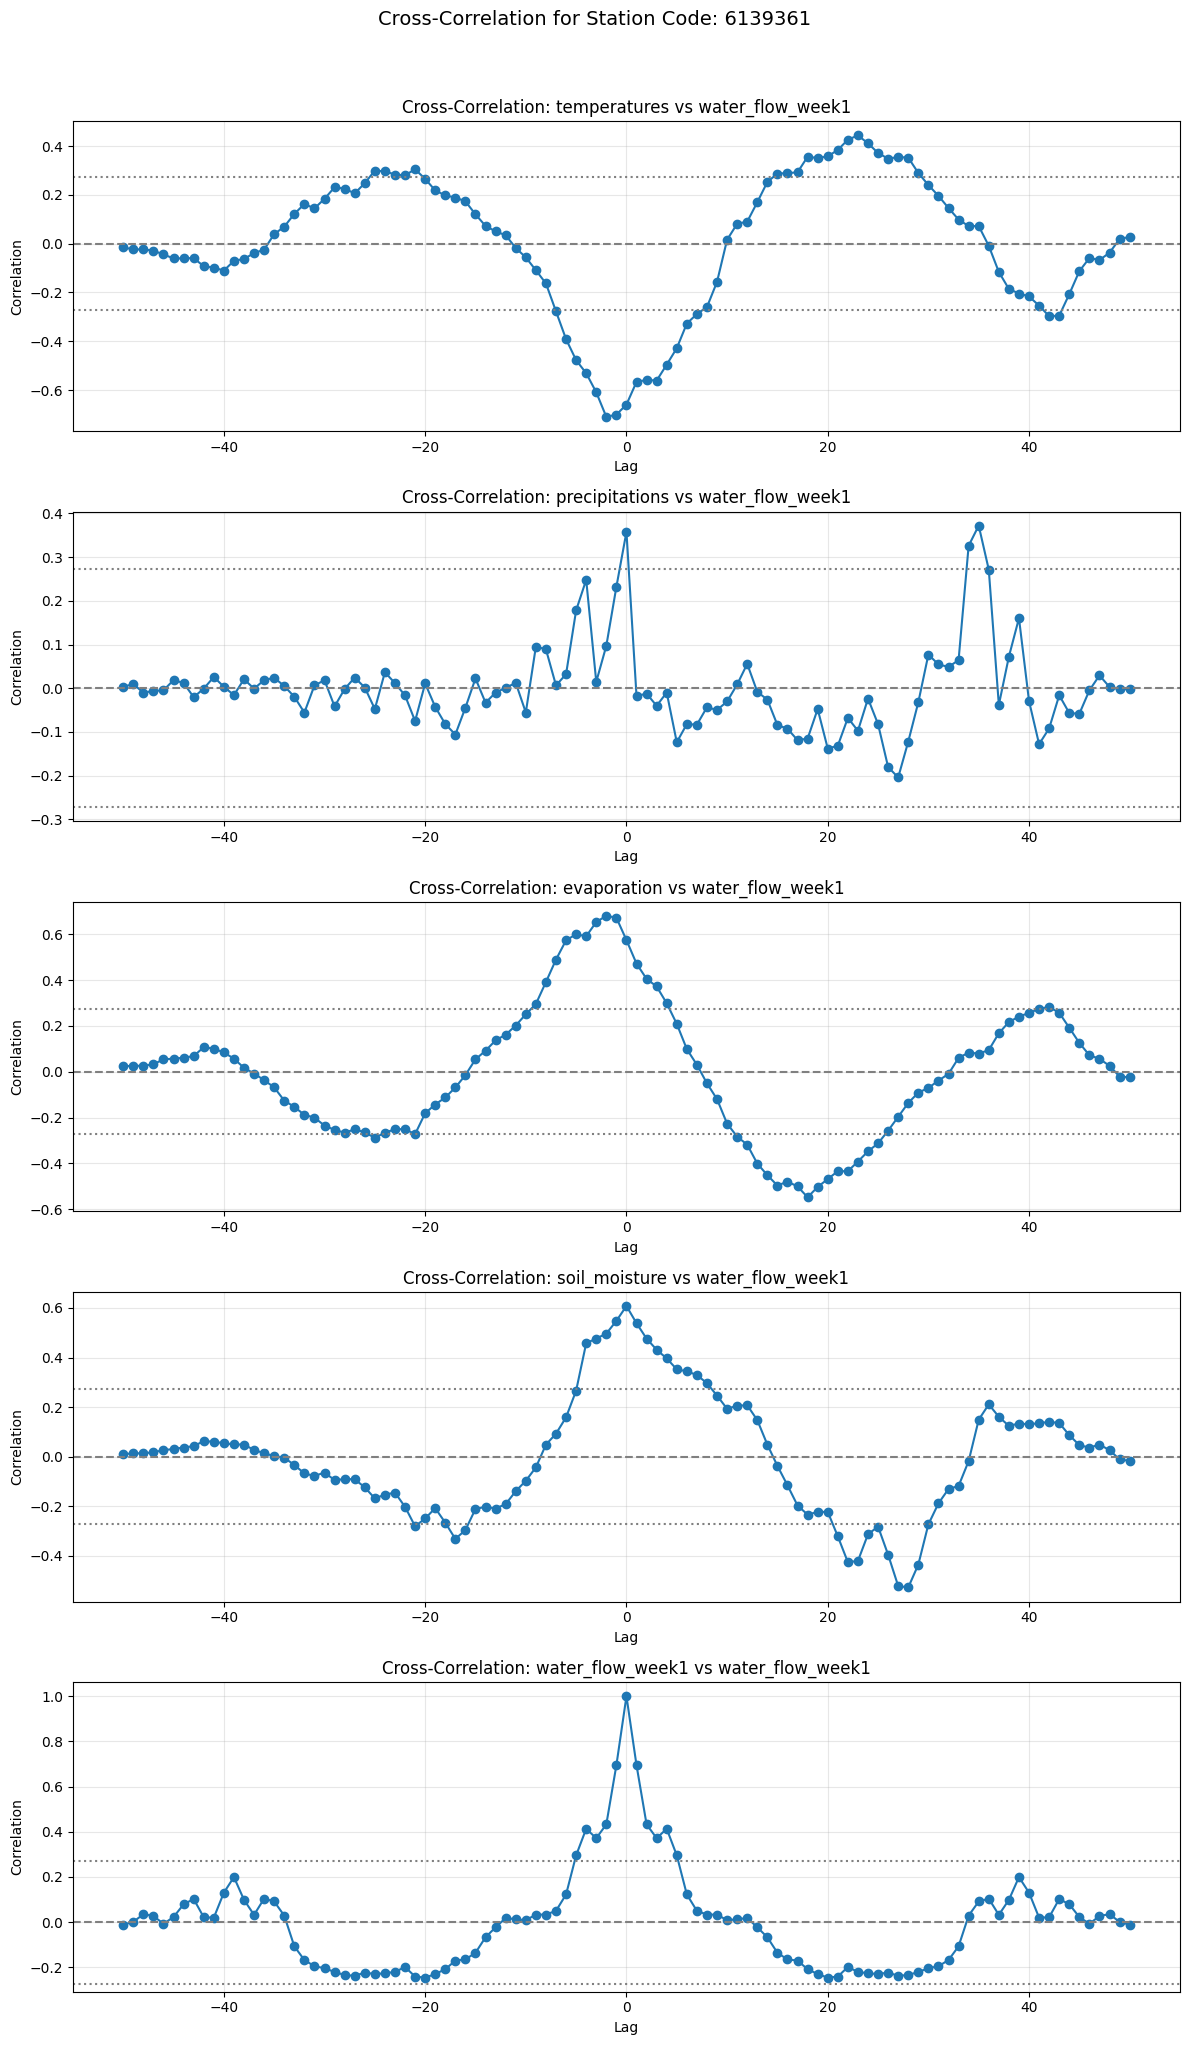

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def plot_cross_correlation_by_station(
    df,
    temporal_cols,
    target_column,
    station_codes,
    start_date=None,
    end_date=None,
    nlags=30,
):
    """
    Plot cross-correlation of each temporal column against a target column for each station code.

    Parameters:
    - df: DataFrame containing the data.
    - temporal_cols: List of temporal columns to cross-correlate with target_column.
    - target_column: The target column for cross-correlation.
    - station_codes: List of station codes to plot.
    - start_date, end_date: Optional time interval to filter data.
    - nlags: Number of lags to compute for cross-correlation.
    """
    if "ObsDate" not in df.columns:
        raise ValueError("'ObsDate' column not found in DataFrame.")
    if "station_code" not in df.columns:
        raise ValueError("'station_code' column not found in DataFrame.")
    if target_column not in df.columns:
        raise ValueError(f"'{target_column}' column not found in DataFrame.")

    df = df.copy()
    df["ObsDate"] = pd.to_datetime(df["ObsDate"])
    df = df.sort_values("ObsDate")

    if start_date is not None:
        start_date = pd.to_datetime(start_date)
        df = df[df["ObsDate"] >= start_date]
    if end_date is not None:
        end_date = pd.to_datetime(end_date)
        df = df[df["ObsDate"] <= end_date]

    for code in station_codes:
        station_df = df[df["station_code"] == code]
        if station_df.empty:
            print(f"No data for station code: {code}")
            continue

        fig, axes = plt.subplots(
            len(temporal_cols), 1, figsize=(12, 4 * len(temporal_cols))
        )
        fig.suptitle(f"Cross-Correlation for Station Code: {code}", y=1.02, fontsize=14)

        if len(temporal_cols) == 1:
            axes = [axes]

        for i, col in enumerate(temporal_cols):
            if col in station_df.columns:
                ax = axes[i]
                x = station_df[col].values
                y = station_df[target_column].values

                # Compute cross-correlation
                corr = np.correlate(x - np.mean(x), y - np.mean(y), mode="full")
                corr = corr / (np.std(x) * np.std(y) * len(x))

                lags = np.arange(-len(x) + 1, len(x))
                center_index = len(lags) // 2
                corr = corr[center_index - nlags : center_index + nlags + 1]
                lags = lags[center_index - nlags : center_index + nlags + 1]

                ax.plot(lags, corr, marker="o", linestyle="-")
                ax.axhline(0, color="gray", linestyle="--")
                ax.axhline(
                    y=1.96 / np.sqrt(len(station_df)), color="gray", linestyle=":"
                )
                ax.axhline(
                    y=-1.96 / np.sqrt(len(station_df)), color="gray", linestyle=":"
                )

                ax.set_title(f"Cross-Correlation: {col} vs {target_column}")
                ax.set_xlabel("Lag")
                ax.set_ylabel("Correlation")
                ax.grid(True, alpha=0.3)
            else:
                print(f"Column '{col}' not found in DataFrame.")

        plt.tight_layout()
        plt.show()


plot_cross_correlation_by_station(
    dataset_train,
    temporal_cols=[
        ts
        for ts in data_dict["temporal_data"]
        if ts
        not in ["ObsDate", "water_flow_week2", "water_flow_week3", "water_flow_week4"]
    ],
    target_column="water_flow_week1",
    station_codes=dataset_train["station_code"].sample(n=2, random_state=42).unique(),
    start_date="1999-01-01",
    end_date="1999-12-31",
    nlags=50,
)

In [33]:
# function What to Plot: A heatmap with the Year on the y-axis, Month on the x-axis, and the color representing the average water_flow_week1. Create one for France and one for Brazil.


def plot_heatmap_water_flow(df, area, title):
    df = df.copy()
    df["ObsDate"] = pd.to_datetime(df["ObsDate"], errors="coerce")
    df = df[df["area"] == area]

    # Extract year and month
    df["Year"] = df["ObsDate"].dt.year
    df["Month"] = df["ObsDate"].dt.month

    # Group by Year and Month to calculate average water_flow_week1
    heatmap_data = (
        df.groupby(["Year", "Month"])["water_flow_week1"].mean().unstack(level="Month")
    )

    plt.figure(figsize=(12, 8))
    if HAS_SEABORN:
        sns.heatmap(
            heatmap_data,
            annot=True,
            fmt=".1f",
            cmap="YlGnBu",
            cbar_kws={"label": "Avg Water Flow Week 1"},
        )
    else:
        plt.imshow(heatmap_data, aspect="auto", cmap="YlGnBu")
        plt.colorbar(label="Avg Water Flow Week 1")
        plt.xticks(ticks=np.arange(12), labels=np.arange(1, 13))
        plt.yticks(ticks=np.arange(len(heatmap_data.index)), labels=heatmap_data.index)

    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Year")
    plt.tight_layout()
    plt.show()


# Plot heatmap for France
plot_heatmap_water_flow(
    dataset_train, area="france", title="Average Water Flow Week 1 - France"
)

# Plot heatmap for Brazil
plot_heatmap_water_flow(
    dataset_train, area="brazil", title="Average Water Flow Week 1 - Brazil"
)

NameError: name 'HAS_SEABORN' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
39 * 6 * 52

12168